# Data Science Take Home | Danny_Helfman

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Business Objective

* Choose one of the datasets ([coffee.csv](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-07-07)), or another dataset of your choosing, and perform an exploratory data analysis

* You may choose whatever coding language or tool you are comfortable with to perform the analysis

* Please submit an analysis within 5 days of receiving this email

* Submission format can be any of your choosing, whatever you feel is best to communicate your analysis

* Please submit all code written to perform the analysis as well

* No subject matter expertise is expected, feel free to make any assumptions you feel are necessary

* There is no specified length of the analysis, but the expectation is that you should spend no more than 3 hours on it- a 10-page thesis is not expected

* **I will be adding to the Exploratory Data Analysis by predicting whether the coffee is either arabica or robusta using binary classification. Please excuse overall model performance and proprocessing because this is for the sample take home example!**

### Data Dictionary


● total_cup_points:	Total rating/points (0 - 100 scale)

● species: Species of coffee bean (arabica or robusta)

● owner: Owner of the farm

● country_of_origin: Where the bean came from

● farm_name: Name of the farm

● lot_number: Lot number of the beans tested

● mill: Mill where the beans were processed

● ico_number: International Coffee Organization number

● company: Company name

● altitude: Altitude

● region: Region where bean came from

● producer:Producer of the roasted bean

● number_of_bags: Number of bags tested

● bag_weight: Bag weight tested

● in_country_partner: Partner for the country

● harvest_year: When the beans were harvested (year)

● grading_date: When the beans were graded

● owner_1: Who owns the beans

● variety: Variety of the beans

● processing_method: Method for processing

● aroma: Aroma grade

● flavor: Flavor grade

● aftertaste: Aftertaste grade

● acidity: Acidity grade

● body: Body grade

● balance: Balance grade

● uniformity: Uniformity grade

● clean_cup: Clean cup grade

● sweetness: Sweetness grade

● cupper_points: Cupper Points

● moisture: Moisture Grade

● category_one_defects: Category one defects (count)

● quakers: quakers

● color: Color of bean

● category_two_defects: Category two defects (count)

● expiration: Expiration date of the beans

● certification_body: Who certified it

● certification_address: Certification body address

● certification_contact: Certification contact

● unit_of_measurement: Unit of measurement

● altitude_low_meters: Altitude low meters

● altitude_high_meters: Altitude high meters

● altitude_mean_meters: Altitude mean meters

## Obtain

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# data cleaning and visualizations
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer # needed for IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# unsupervised learning
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture

# classification models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm.sklearn import LGBMClassifier
from catboost import CatBoostClassifier

# regression models
from sklearn.linear_model import LogisticRegressionCV

# model evaluation and performance metrics
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold, GroupShuffleSplit
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, plot_precision_recall_curve, roc_curve, roc_auc_score, brier_score_loss, DetCurveDisplay
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef, classification_report, fbeta_score, hamming_loss, jaccard_score, zero_one_loss, top_k_accuracy_score, average_precision_score, plot_roc_curve, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

# model inspection and feature importance
from sklearn.inspection import plot_partial_dependence, PartialDependenceDisplay
#from pdpbox import pdp

# model persistence
from joblib import dump, load

In [ ]:
# adjusting notebook settings
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

np.set_printoptions(precision=2)
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.set_option.html
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('precision', 2)

from matplotlib import style # print(plt.style.available) to find other plot styles
#plt.style.use('seaborn-white')
style.use('seaborn-white')

#mpl.rcParams['axes.labelsize'] = 20
#mpl.rcParams['axes.titlesize'] = 24
#mpl.rcParams['figure.figsize'] = (30, 20)
#mpl.rcParams['xtick.labelsize'] = 14
#mpl.rcParams['ytick.labelsize'] = 14
#mpl.rcParams['legend.fontsize'] = 14

plt.ion()
%matplotlib inline
%xmode Verbose
%config InlineBackend.figure_format = 'retina'
# %lsmagic
# %debug # https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/01.06-Errors-and-Debugging.ipynb

# %unload_ext google.colab.data_table
# %load_ext google.colab.data_table

Exception reporting mode: Verbose


In [ ]:
dataset_csv = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv"
dataset_df = pd.read_csv(dataset_csv)
dataset_df.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [ ]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1182 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

In [ ]:
dataset_df.describe()

,total_cup_points,number_of_bags,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.00,1339.00,1339.00,1339.00,1339.00,1339.00,1339.00,1339.00,1339.00,1339.00,1339.00,1339.00,1339.00,1339.00,1338.00,1339.00,1109.00,1109.00,1109.00
mean,82.09,154.18,7.57,7.52,7.40,7.54,7.52,7.52,9.83,9.84,9.86,7.50,0.09,0.48,0.17,3.56,1750.71,1799.35,1775.03
std,3.50,129.99,0.38,0.40,0.40,0.38,0.37,0.41,0.55,0.76,0.62,0.47,0.05,2.55,0.83,5.31,8669.44,8668.81,8668.63
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,81.08,14.00,7.42,7.33,7.25,7.33,7.33,7.33,10.00,10.00,10.00,7.25,0.09,0.00,0.00,0.00,1100.00,1100.00,1100.00
50%,82.50,175.00,7.58,7.58,7.42,7.58,7.50,7.50,10.00,10.00,10.00,7.50,0.11,0.00,0.00,2.00,1310.64,1350.00,1310.64
75%,83.67,275.00,7.75,7.75,7.58,7.75,7.67,7.75,10.00,10.00,10.00,7.75,0.12,0.00,0.00,4.00,1600.00,1650.00,1600.00
max,90.58,1062.00,8.75,8.83,8.67,8.75,8.58,8.75,10.00,10.00,10.00,10.00,0.28,63.00,11.00,55.00,190164.00,190164.00,190164.00


In [ ]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(dataset_df.groupby('species')[feature].describe())
    print(ttest(feature))

def ttest(feature):
    arabica = dataset_df[dataset_df['species']=='arabica'][feature]
    robusta = dataset_df[dataset_df['species']=='robusta'][feature]
    tstat, pval = stats.ttest_ind(arabica, robusta, equal_var=False)

# Look at the distribution of each feature at each level of the target variable
for feature in ['total_cup_points','number_of_bags', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points','moisture',
'category_one_defects', 'quakers', 'category_two_defects', 'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters']:
    describe_cont_feature(feature)


*** Results for total_cup_points ***
          count   mean   std    min    25%   50%    75%    max
species                                                       
Arabica  1311.0  82.12  3.52   0.00  81.17  82.5  83.67  90.58
Robusta    28.0  80.87  2.44  73.75  80.17  81.5  82.52  83.75
None

*** Results for number_of_bags ***
          count    mean     std  min   25%    50%    75%     max
species                                                         
Arabica  1311.0  153.89  129.73  0.0  14.5  175.0  275.0  1062.0
Robusta    28.0  168.00  143.23  1.0   1.0  170.0  320.0   320.0
None

*** Results for aroma ***
          count  mean   std   min   25%   50%   75%   max
species                                                  
Arabica  1311.0  7.56  0.38  0.00  7.42  7.58  7.75  8.75
Robusta    28.0  7.70  0.30  6.75  7.58  7.67  7.92  8.33
None

*** Results for flavor ***
          count  mean  std   min   25%   50%   75%   max
species                                                

In [ ]:
# percentages of missing data for columns
dataset_df.isnull().sum() / dataset_df.shape[0] * 100

total_cup_points          0.00
species                   0.00
owner                     0.52
country_of_origin         0.07
farm_name                26.81
lot_number               79.39
mill                     23.75
ico_number               11.73
company                  15.61
altitude                 16.88
region                    4.41
producer                 17.33
number_of_bags            0.00
bag_weight                0.00
in_country_partner        0.00
harvest_year              3.51
grading_date              0.00
owner_1                   0.52
variety                  16.88
processing_method        12.70
aroma                     0.00
flavor                    0.00
aftertaste                0.00
acidity                   0.00
body                      0.00
balance                   0.00
uniformity                0.00
clean_cup                 0.00
sweetness                 0.00
cupper_points             0.00
moisture                  0.00
category_one_defects      0.00
quakers 

In [ ]:
# for the sake of take home assignment, dropping columns with missing values
# you can also impute the missing values based off what the business objective is

dataset_df_dropped = dataset_df.drop(['farm_name', 'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region', 'producer', 'harvest_year', 'variety', 'processing_method', 'color', 'altitude_low_meters',
'altitude_high_meters', 'altitude_mean_meters'], axis=1)

In [ ]:
dataset_df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   number_of_bags         1339 non-null   int64  
 5   bag_weight             1339 non-null   object 
 6   in_country_partner     1339 non-null   object 
 7   grading_date           1339 non-null   object 
 8   owner_1                1332 non-null   object 
 9   aroma                  1339 non-null   float64
 10  flavor                 1339 non-null   float64
 11  aftertaste             1339 non-null   float64
 12  acidity                1339 non-null   float64
 13  body                   1339 non-null   float64
 14  balance                1339 non-null   float64
 15  unif

### Split Data

(Splitting Data before EDA to ensure no [data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/))


1. Training Dataset (60%)- data used to train the model

2. Validation Dataset (20%)- data used to select the best model using optional algorithms and hyperparameter settings

4. Test Dataset (20%)- data used to provide an unbiased evaluation of what the model will look like in its real environment

In [ ]:
# features
X = dataset_df_dropped.drop(['species'],  axis=1)

# labels
y = dataset_df_dropped['species']

In [ ]:
# 1. split data by 40%
# 2. split same datasets again by .50% percent to get 20% splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


# showing the split percentages
for dataset in[y_train, y_val, y_test]:
    print(round(len(dataset) / len(y), 2))

0.6
0.2
0.2


### Checking Imbalanced Target Variable

In [ ]:
# in this case, target variable we are wanting to predict is imbalanced
# we would want to go back to gather more data or use a resampling method (ex. imbalanced learn)
y_train.value_counts()

Arabica    791
Robusta     12
Name: species, dtype: int64

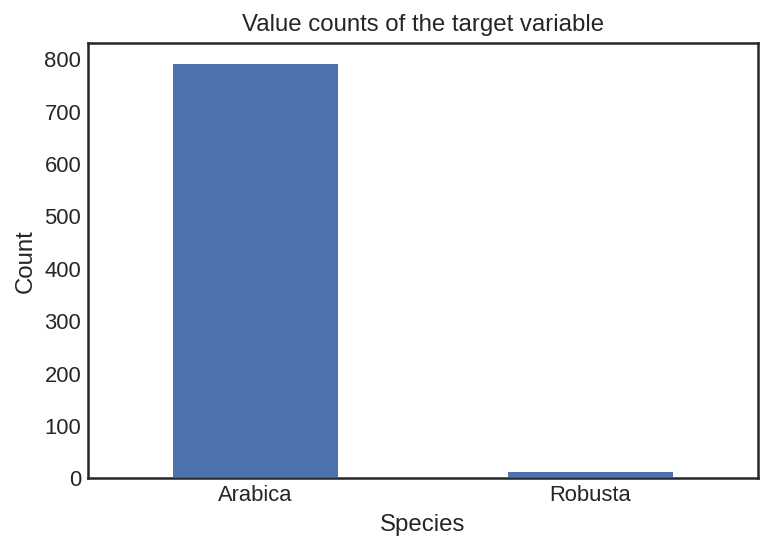

In [ ]:
y_train.value_counts().plot(kind="bar")
plt.title("Value counts of the target variable")
plt.xlabel("Species")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

### Exploratory Data Analysis

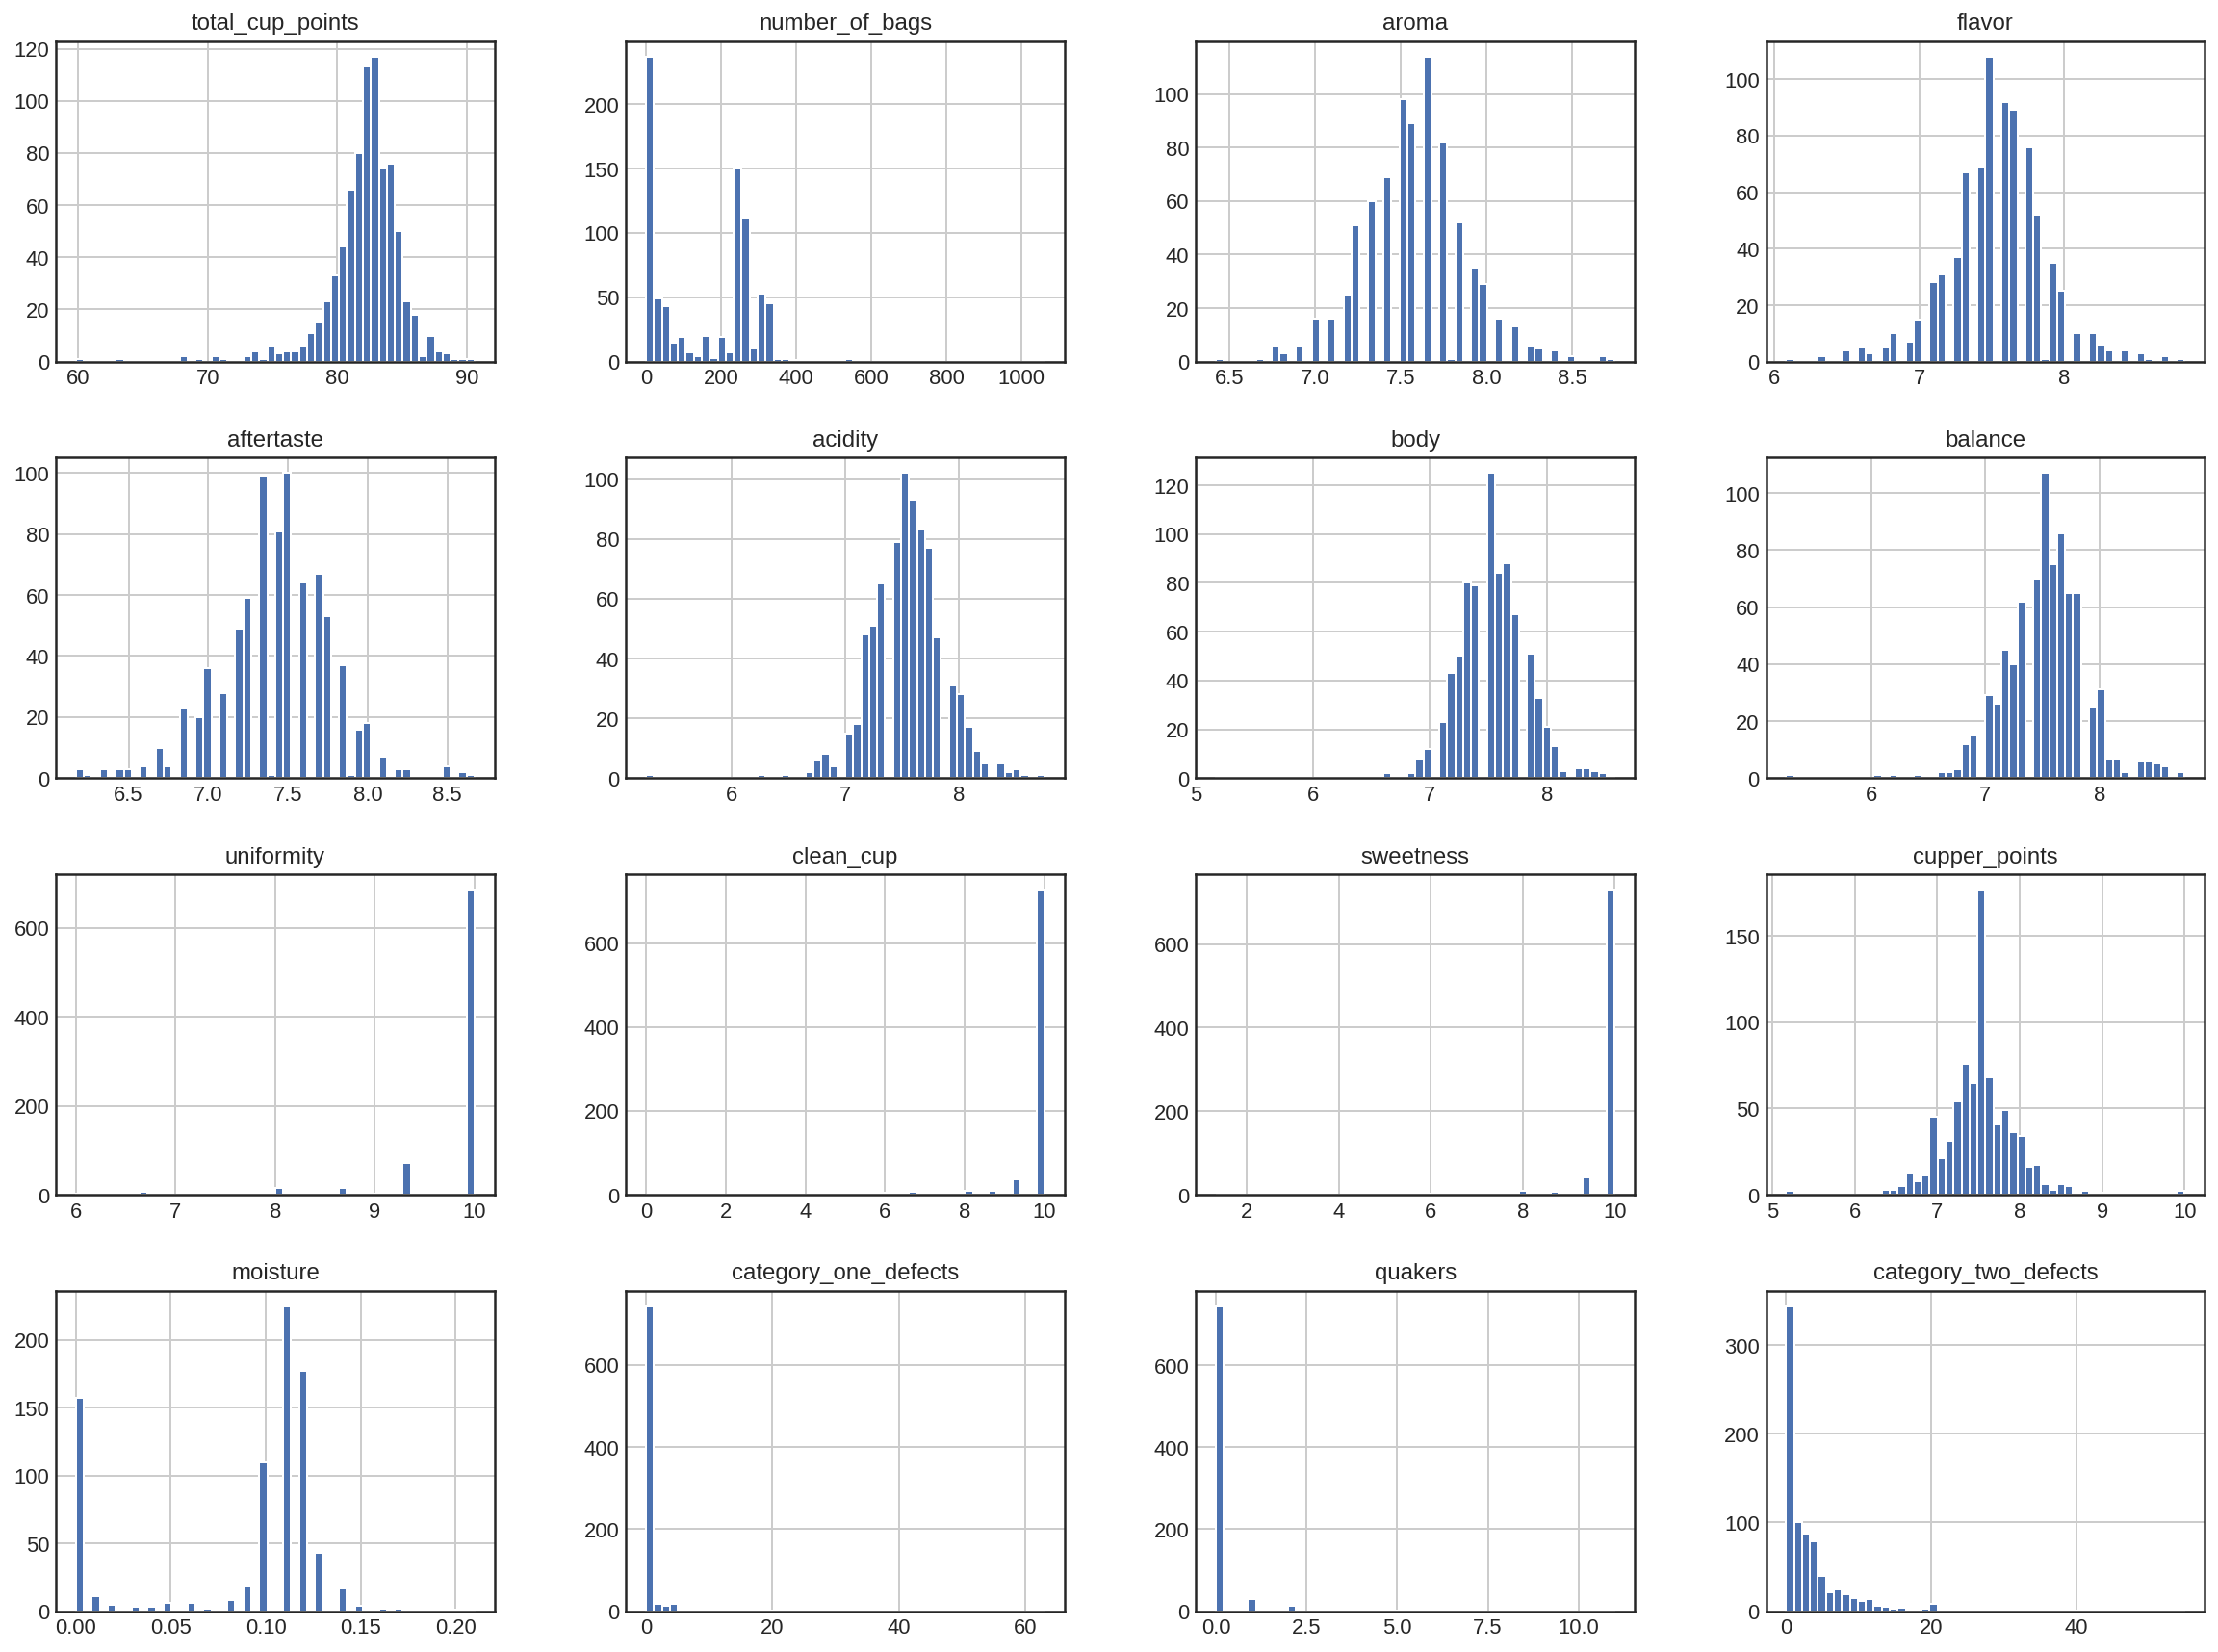

In [ ]:
X_train.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
X_train.head()

,total_cup_points,owner,country_of_origin,number_of_bags,bag_weight,in_country_partner,grading_date,owner_1,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement
666,82.50,saul m. hernandez ramirez,Mexico,10,1 kg,AMECAFE,"September 27th, 2012",SAUL M. HERNANDEZ RAMIREZ,7.50,7.58,7.50,7.50,7.42,7.42,10.0,10.0,10.0,7.58,0.13,0,0.0,10,"September 27th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m
682,82.42,gladness obed pallangyo,"Tanzania, United Republic Of",10,60 kg,Africa Fine Coffee Association,"November 16th, 2015",Gladness Obed Pallangyo,7.67,7.25,7.42,7.42,7.67,7.42,10.0,10.0,10.0,7.58,0.13,0,0.0,7,"November 15th, 2016",Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,m
256,84.00,afca,Uganda,320,60 kg,Africa Fine Coffee Association,"February 13th, 2012",AFCA,7.92,7.75,7.58,7.67,7.67,7.83,10.0,10.0,10.0,7.58,0.10,10,0.0,26,"February 12th, 2013",Africa Fine Coffee Association,073285c0d45e2f5539012d969937e529564fa6fe,c4ab13415cdd69376a93780c0166e7b1a10481ea,m
25,86.92,nucoffee,Brazil,3,60 kg,NUCOFFEE,"December 3rd, 2011",NUCOFFEE,8.50,8.50,8.00,8.00,8.00,8.00,10.0,10.0,10.0,7.92,0.12,0,0.0,2,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m
336,83.58,juan luis alvarado romero,Guatemala,275,69 kg,Asociacion Nacional Del Café,"July 5th, 2016",Juan Luis Alvarado Romero,7.75,7.75,7.50,7.83,7.58,7.58,10.0,10.0,10.0,7.58,0.11,0,1.0,0,"July 5th, 2017",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft


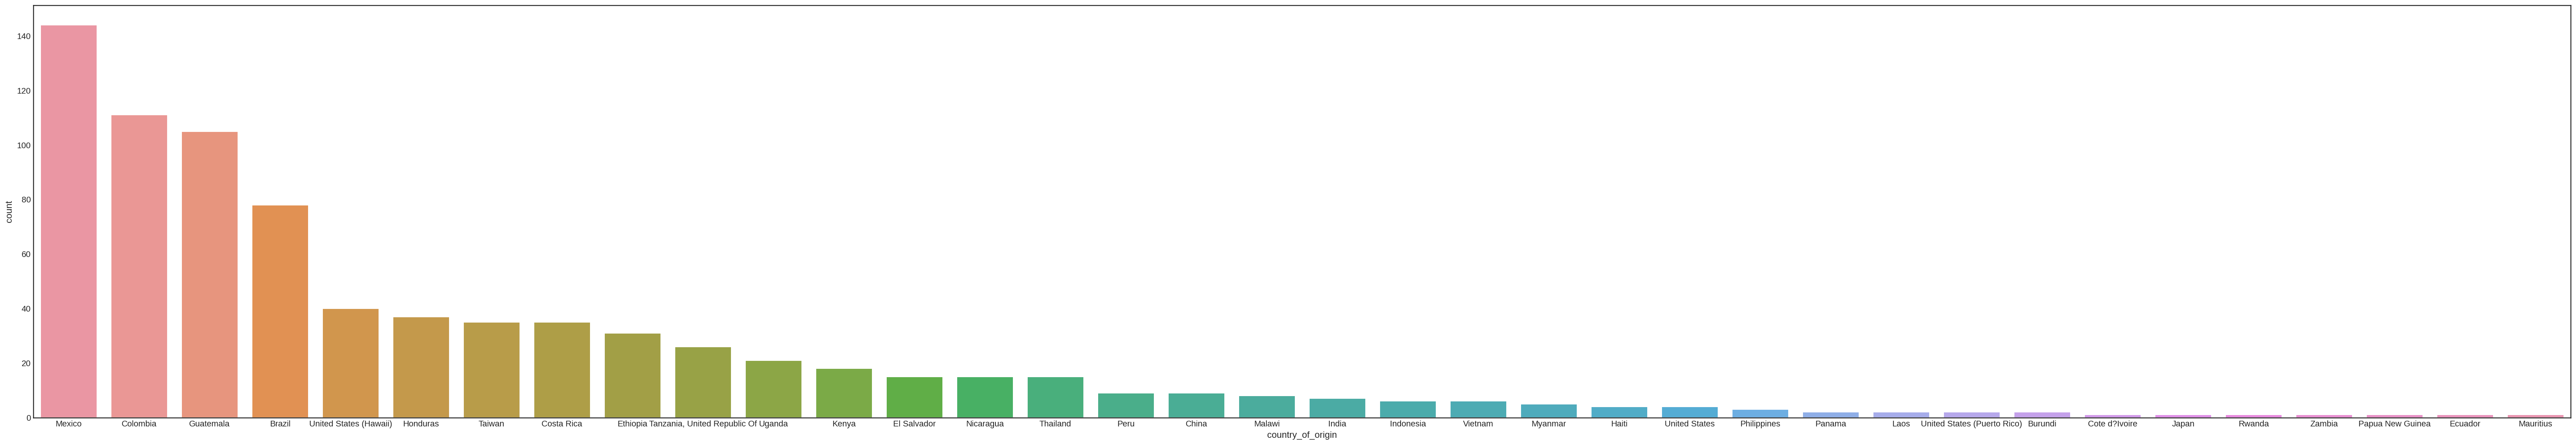

In [ ]:
# checking counts of samples by each country
plt.figure(figsize=(60, 10))
sns.countplot(X_train['country_of_origin'], order=X_train['country_of_origin'].value_counts().index)

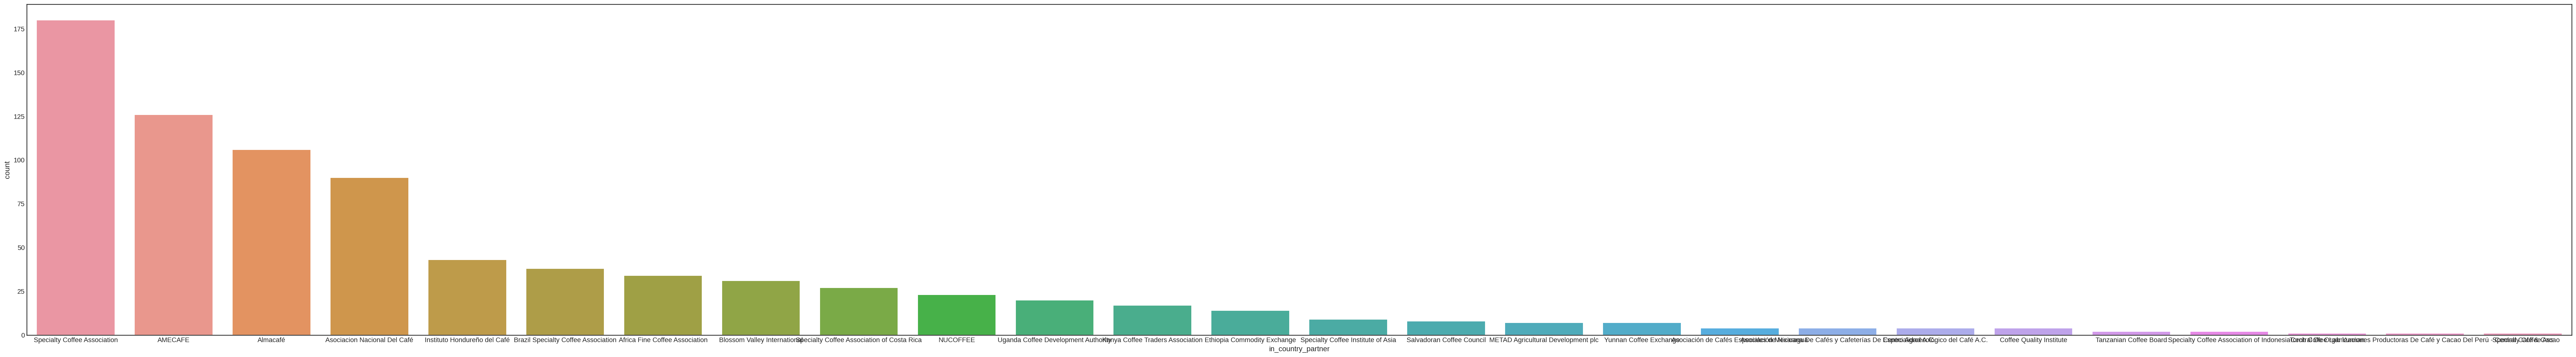

In [ ]:
# checking counts of samples by each in_country_partner
plt.figure(figsize=(75, 10))
sns.countplot(X_train['in_country_partner'], order=X_train['in_country_partner'].value_counts().index)

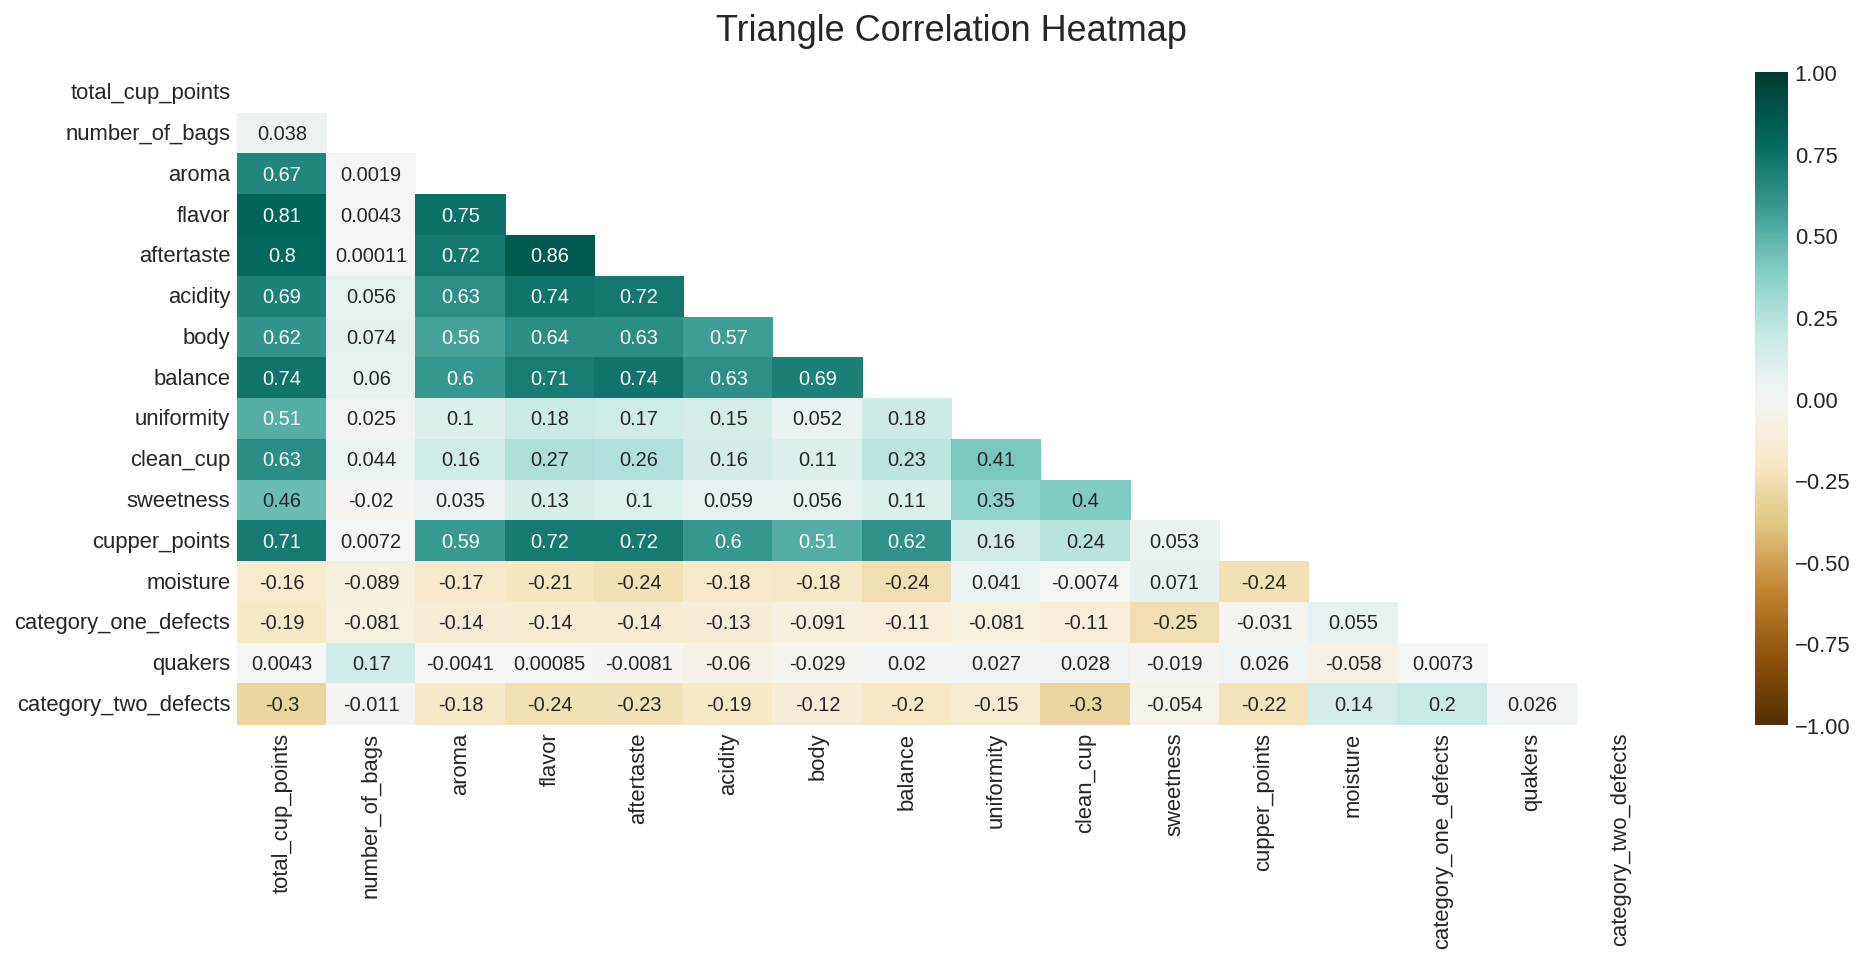

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(X_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

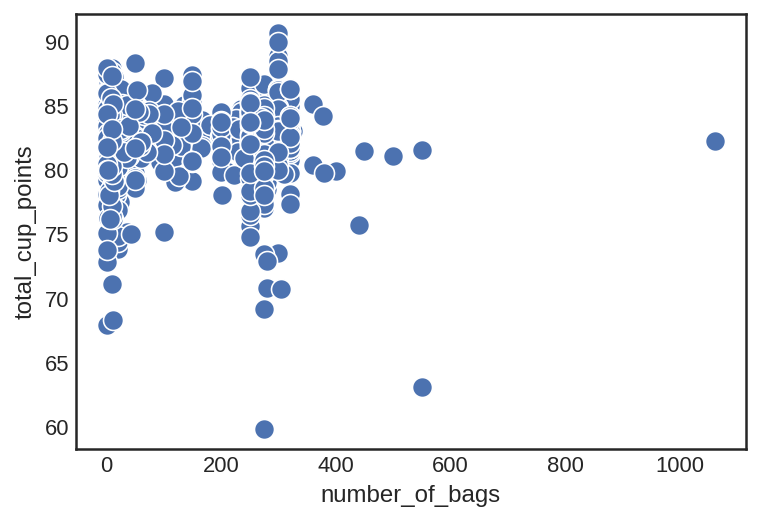

In [ ]:
# total cup points by number of bags
sns.scatterplot(x="number_of_bags", y="total_cup_points",data=X_train, s=100)

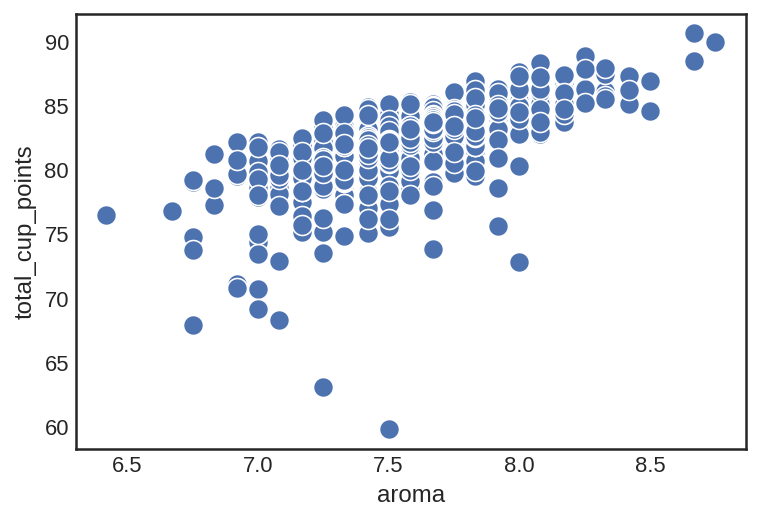

In [ ]:
# total cup points by aroma
sns.scatterplot(x="aroma", y="total_cup_points",data=X_train, s=100)

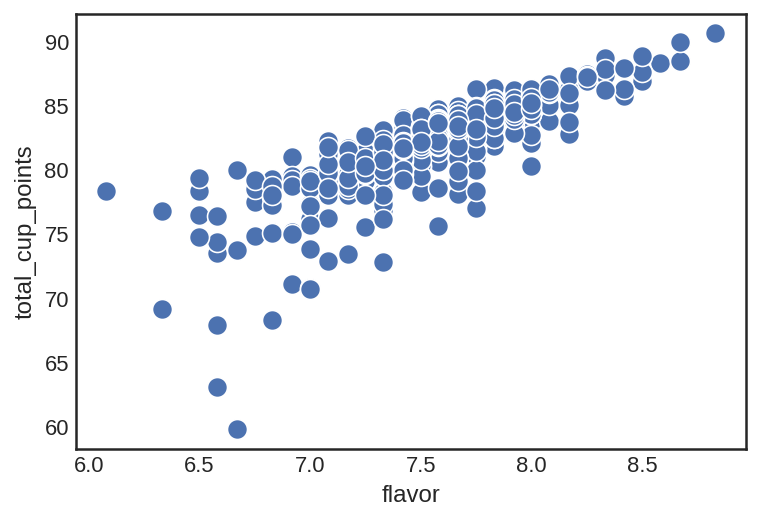

In [ ]:
# total cup points by flavor
sns.scatterplot(x="flavor", y="total_cup_points",data=X_train, s=100)

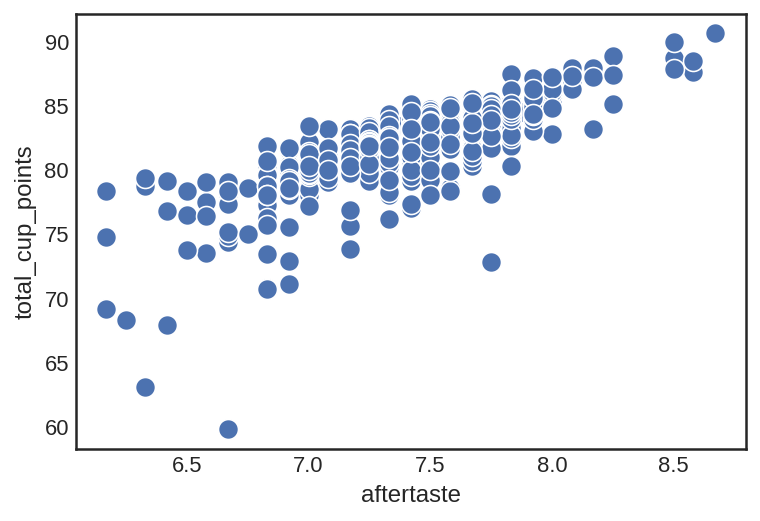

In [ ]:
# total cup points by aftertaste
sns.scatterplot(x="aftertaste", y="total_cup_points",data=X_train, s=100)

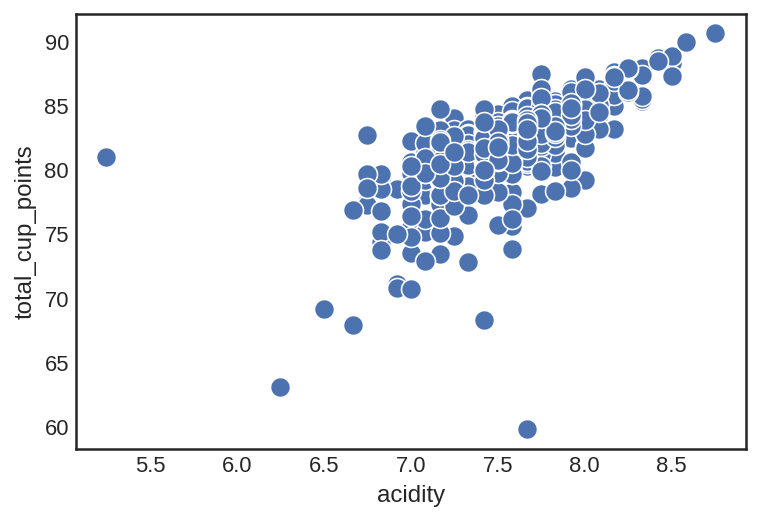

In [ ]:
# total cup points by acidity
sns.scatterplot(x="acidity", y="total_cup_points",data=X_train, s=100)

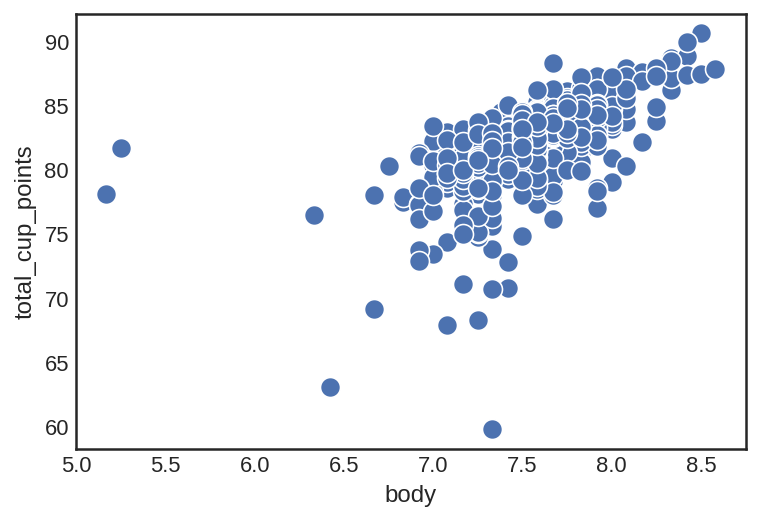

In [ ]:
# total cup points by body
sns.scatterplot(x="body", y="total_cup_points",data=X_train, s=100)

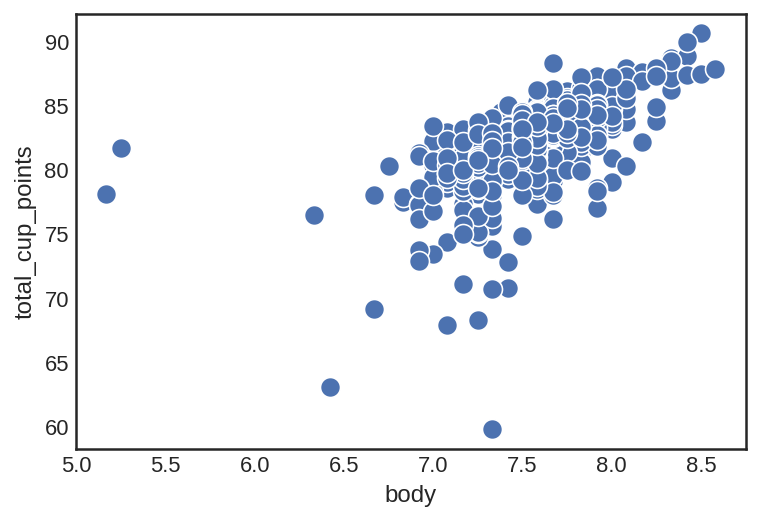

In [ ]:
# total cup points by body
sns.scatterplot(x="body", y="total_cup_points",data=X_train, s=100)

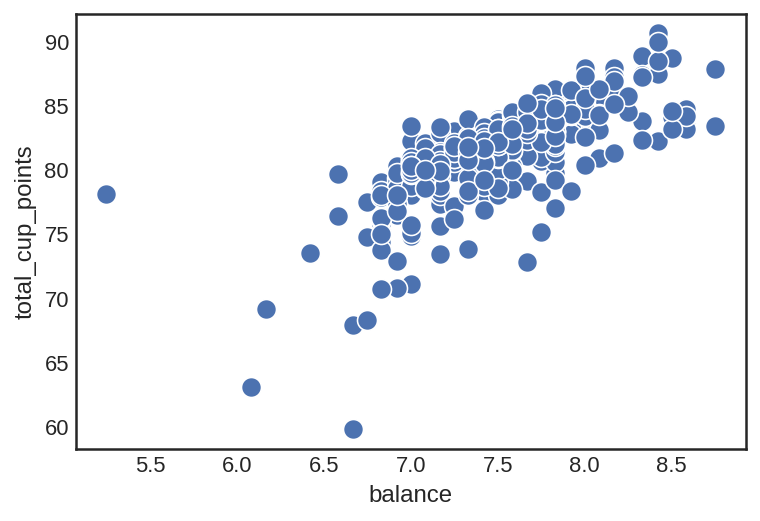

In [ ]:
# balance	uniformity	clean_cup	sweetness
# total cup points by balance
sns.scatterplot(x="balance", y="total_cup_points",data=X_train, s=100)

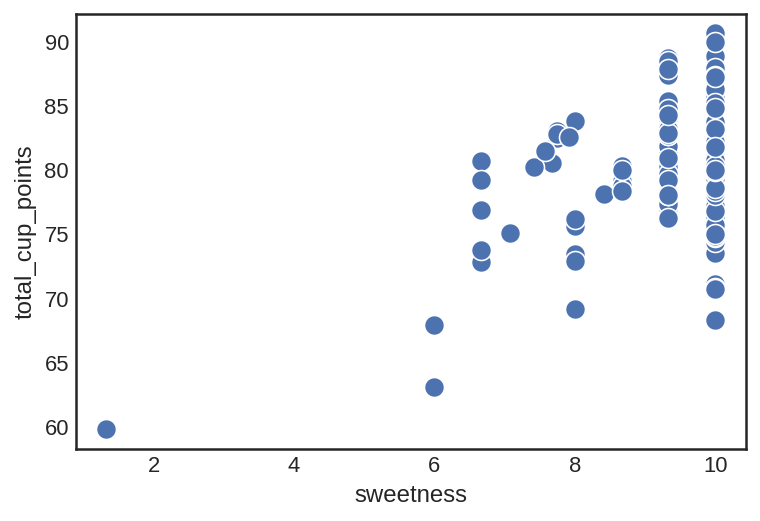

In [ ]:
# total cup points by sweetness
sns.scatterplot(x="sweetness", y="total_cup_points",data=X_train, s=100)

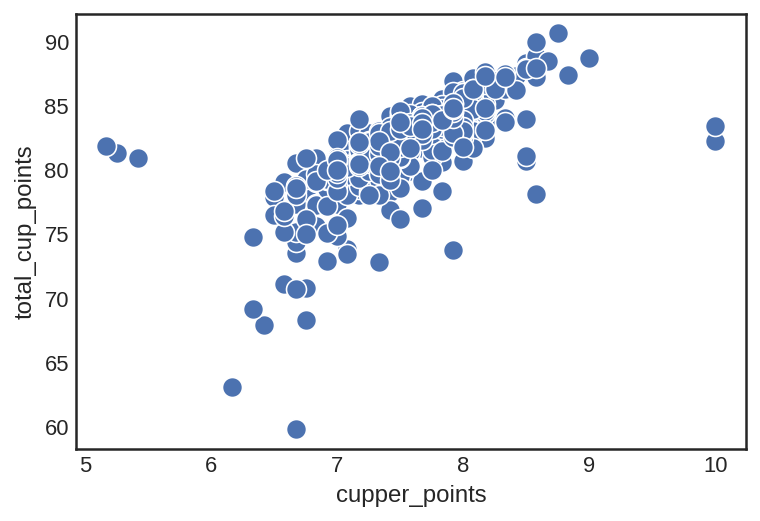

In [ ]:
# total cup points by cupper points
sns.scatterplot(x="cupper_points", y="total_cup_points",data=X_train, s=100)

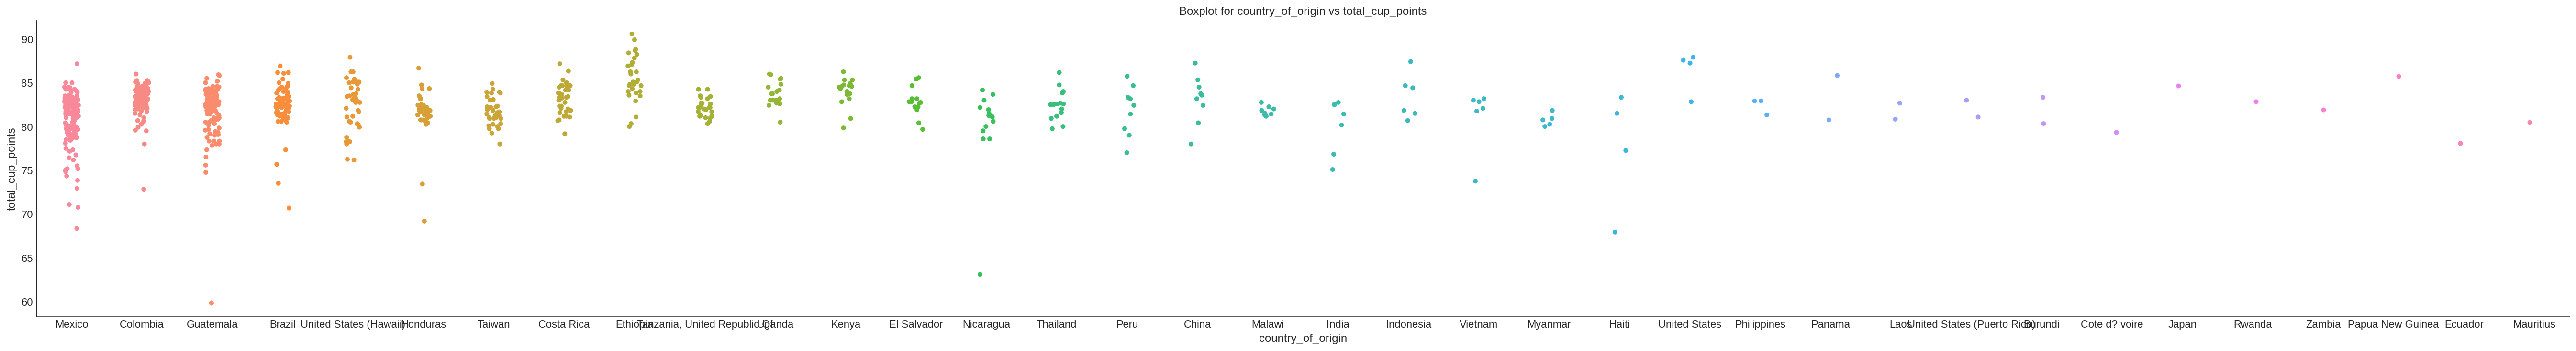

In [ ]:
sns.catplot(x="country_of_origin", y="total_cup_points", data=X_train, kind="strip", aspect=7.5, order=X_train['country_of_origin'].value_counts().index)
plt.title("Strip Plot for country_of_origin vs total_cup_points")
plt.show()

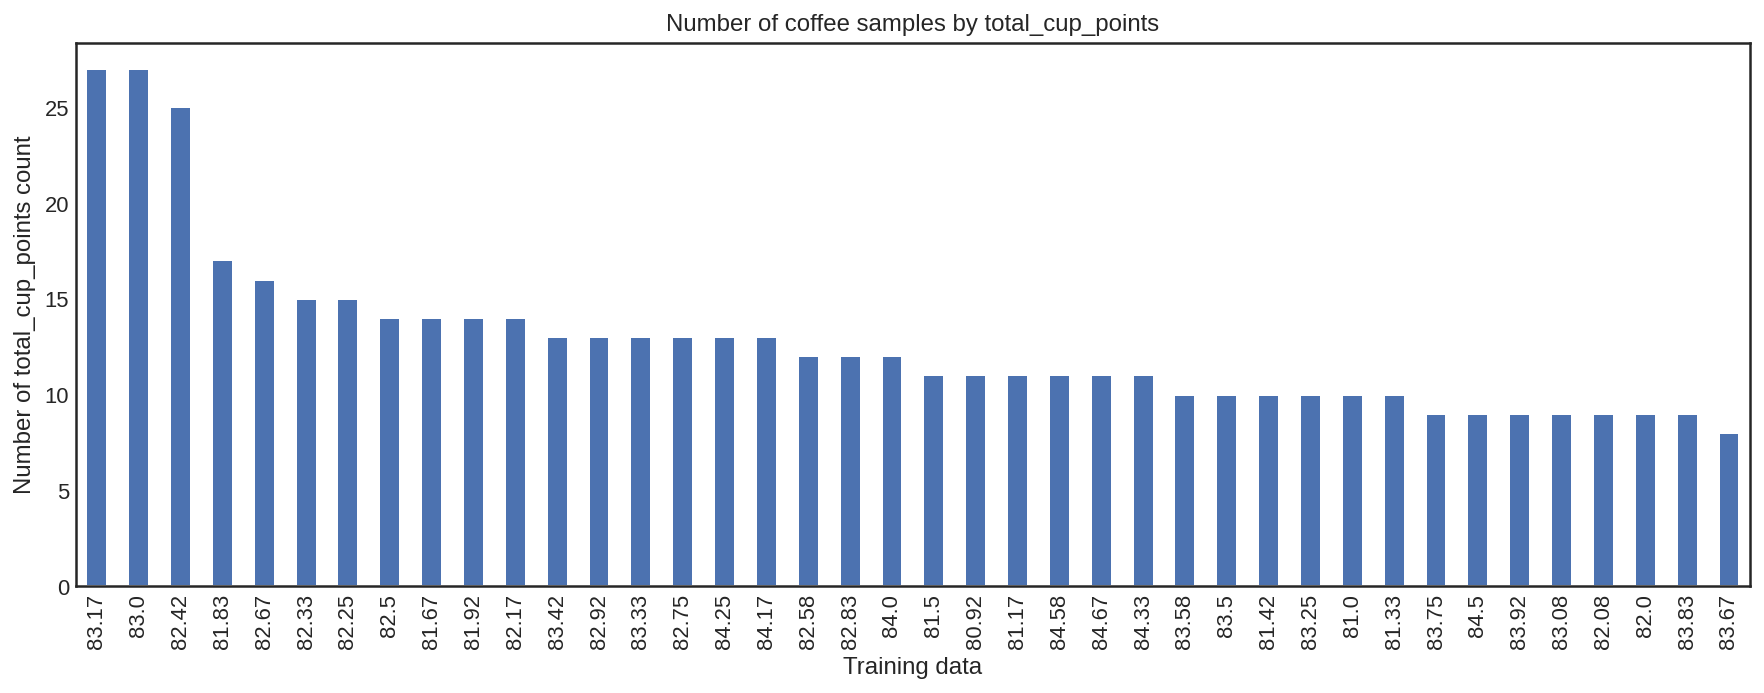

In [ ]:
X_train.total_cup_points.value_counts().nlargest(40).plot(kind='bar', figsize=(15,5))
plt.title("Number of coffee samples by total_cup_points")
plt.ylabel('Number of total_cup_points count')
plt.xlabel('Training data');

count    803.00
mean      82.17
std        2.78
min       59.83
25%       81.08
50%       82.50
75%       83.67
max       90.58
Name: total_cup_points, dtype: float64


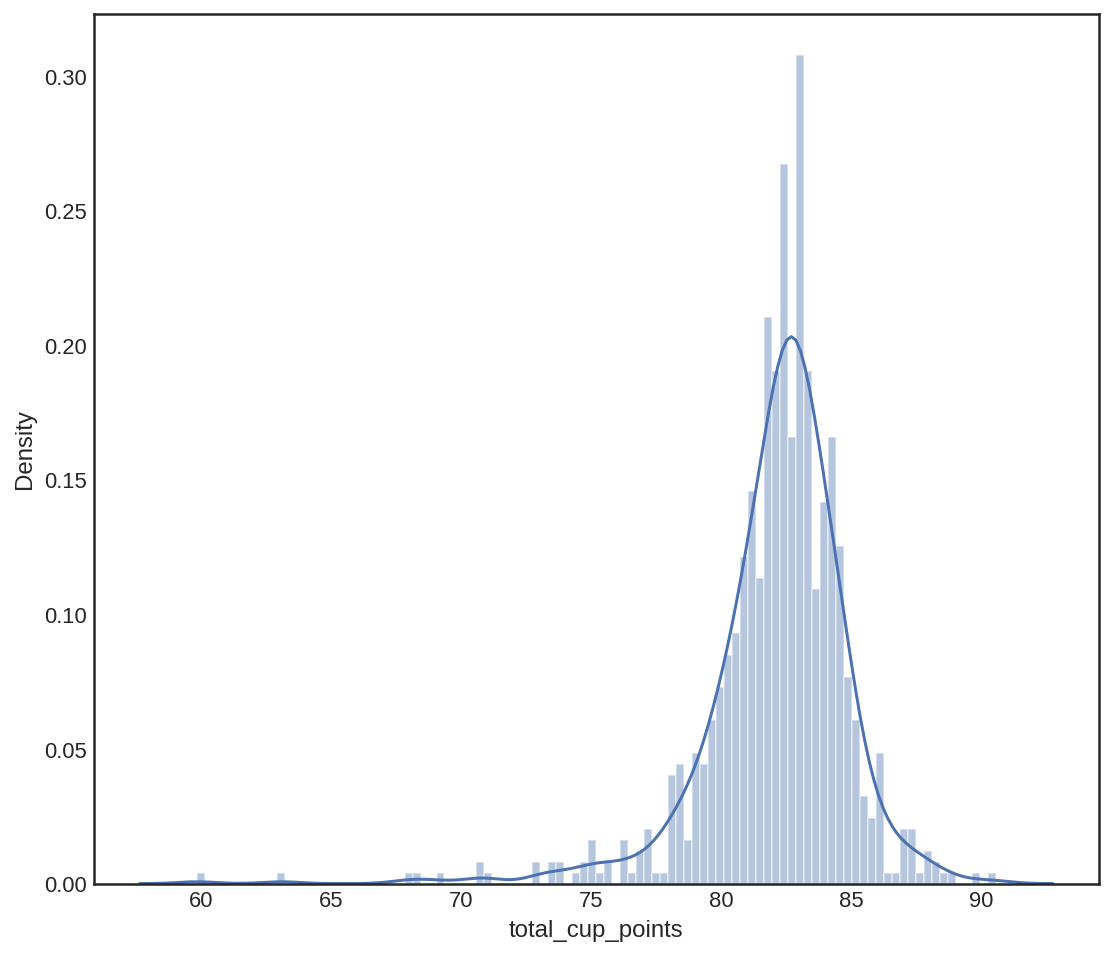

In [ ]:
print(X_train['total_cup_points'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(X_train['total_cup_points'], bins=100, hist_kws={'alpha': 0.4});

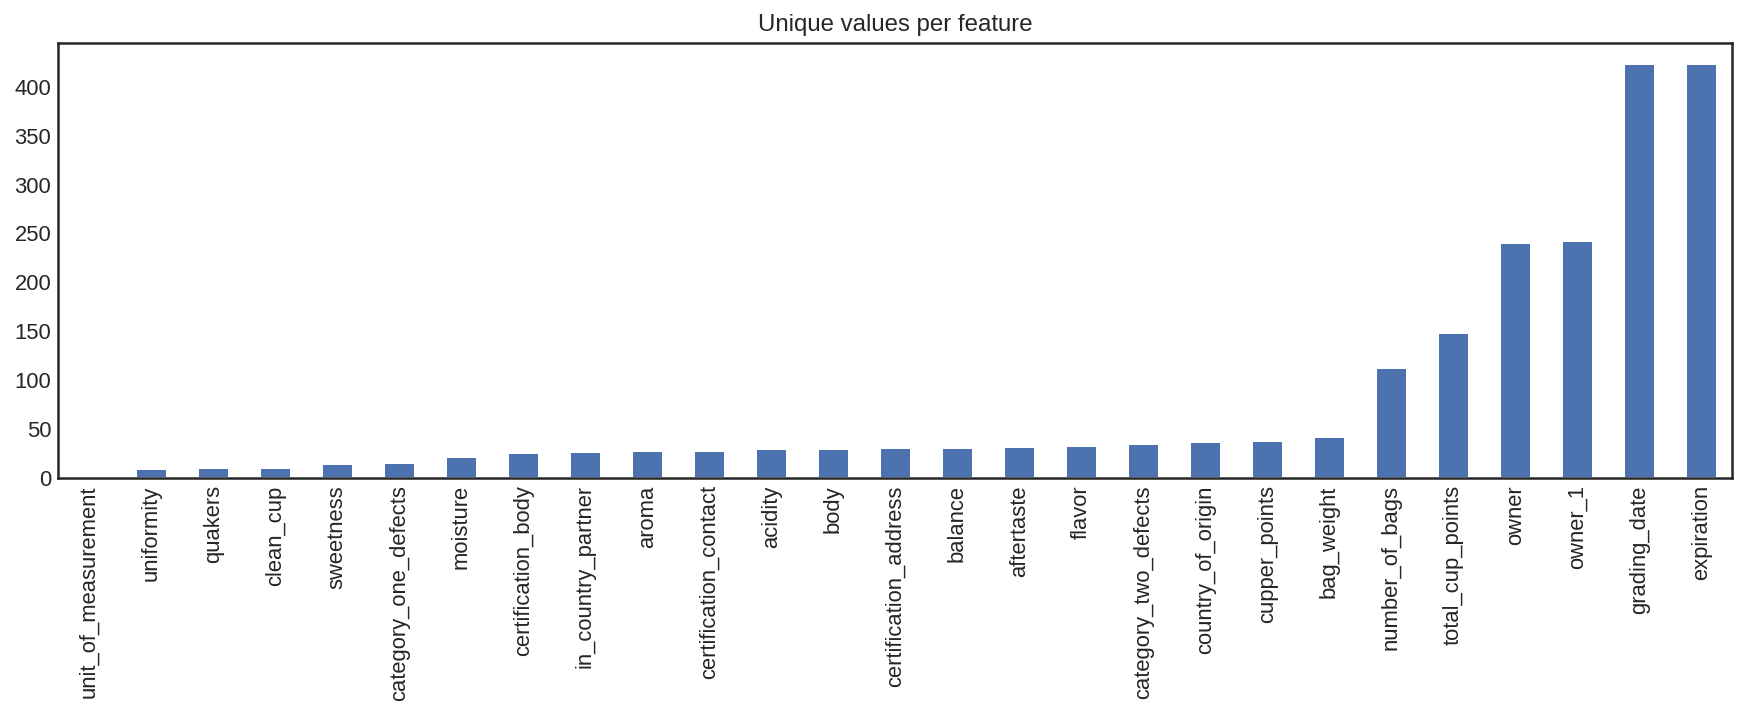

In [ ]:
unique_values = X_train.nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=False, figsize=(15, 4), title="Unique values per feature");

#### Outlier Analysis

In [ ]:
# outlier analysis using quartiles, keeping outliers for the sake of the sample take home prject
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

X_train_outliers_removed = X_train[~((X_train < (Q1 - 1.5 * IQR)) |(dataset_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(X_train.shape)
print(X_train_outliers_removed.shape)

(803, 27)
(359, 27)


In [ ]:
def detect_outlier(feature):
    outliers = []
    data = X_train[feature]
    mean = np.mean(data)
    std = np.std(data)


    for y in data:
        z_score= (y - mean)/std
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

# Determine what the upperbound should be for continuous features
for feat in ['total_cup_points', 'number_of_bags', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body', 'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points', 'moisture',	'category_one_defects',
'quakers', 'category_two_defects']:
    detect_outlier(feat)


Outlier caps for total_cup_points:
  --95p: 85.6 / 40 values exceed that
  --3sd: 90.5 / 14 values exceed that
  --99p: 87.8 / 9 values exceed that

Outlier caps for number_of_bags:
  --95p: 320.0 / 12 values exceed that
  --3sd: 548.1 / 3 values exceed that
  --99p: 376.7 / 9 values exceed that

Outlier caps for aroma:
  --95p: 8.1 / 33 values exceed that
  --3sd: 8.5 / 7 values exceed that
  --99p: 8.4 / 9 values exceed that

Outlier caps for flavor:
  --95p: 8.1 / 41 values exceed that
  --3sd: 8.6 / 11 values exceed that
  --99p: 8.4 / 7 values exceed that

Outlier caps for aftertaste:
  --95p: 7.9 / 38 values exceed that
  --3sd: 8.5 / 14 values exceed that
  --99p: 8.2 / 7 values exceed that

Outlier caps for acidity:
  --95p: 8.1 / 26 values exceed that
  --3sd: 8.5 / 5 values exceed that
  --99p: 8.3 / 7 values exceed that

Outlier caps for body:
  --95p: 8.0 / 30 values exceed that
  --3sd: 8.5 / 7 values exceed that
  --99p: 8.3 / 6 values exceed that

Outlier caps for balan

## Scrub


### Data Prepocessing with [sklearn Pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline)

In [ ]:
# used to out back column names after preprocessing pipeline

def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)

    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]

    ### Start of processing
    feature_names = []

    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))


    for name, trans, column, _ in l_transformers:
        if type(trans) == Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))

    return feature_names

In [ ]:
# specify by columns
X_numerical = X_train.drop(['owner', 'country_of_origin', 'bag_weight', 'in_country_partner', 'owner_1', 'expiration', 'certification_body', 'certification_address', 'certification_contact', 'unit_of_measurement', 'grading_date'], axis=1)
X_categorical = X_train[['owner', 'country_of_origin', 'bag_weight', 'in_country_partner', 'owner_1', 'certification_body', 'unit_of_measurement']]

In [ ]:
num_attribs = list(X_numerical)
cat_attribs = list(X_categorical)

# numerical preprocessing pipeline
# add_indicator=True for SimpleImputer includes new 0,1 column if row was missing data
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # KNNImputer(n_neighbors=3)
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown='ignore', sparse=False), cat_attribs)
])

full_pipeline.fit(X)

X_train_pipeline = full_pipeline.transform(X_train)
X_val_pipeline = full_pipeline.transform(X_val)
X_test_pipeline = full_pipeline.transform(X_test)

In [ ]:
get_feature_names(full_pipeline)

['num__total_cup_points',
 'num__number_of_bags',
 'num__aroma',
 'num__flavor',
 'num__aftertaste',
 'num__acidity',
 'num__body',
 'num__balance',
 'num__uniformity',
 'num__clean_cup',
 'num__sweetness',
 'num__cupper_points',
 'num__moisture',
 'num__category_one_defects',
 'num__quakers',
 'num__category_two_defects',
 'cat__x0_acacia hills ltd',
 'cat__x0_adam ciruli ye',
 'cat__x0_adam kline',
 'cat__x0_adriana torres rico quevedo',
 'cat__x0_afca',
 'cat__x0_alejandro garcia palacios',
 'cat__x0_alexandra katona-carroll',
 'cat__x0_alfredo bojalil',
 'cat__x0_almacafe',
 'cat__x0_alvaro quiros perez',
 'cat__x0_amanda powers',
 'cat__x0_amkeni gourmet coffee group',
 'cat__x0_ana gonzales',
 'cat__x0_andrea bernal',
 'cat__x0_andreas kussmaul',
 'cat__x0_andres martinez leon',
 'cat__x0_andrew bowman',
 'cat__x0_andrew hetzel',
 'cat__x0_andry simarmata',
 'cat__x0_angel oscar medina rodriguez',
 'cat__x0_ankole coffee producers coop',
 'cat__x0_armando luis pohlenz martinez',


In [ ]:
X_train_prepared = pd.DataFrame(X_train_pipeline, columns=get_feature_names(full_pipeline))
X_val_prepared = pd.DataFrame(X_val_pipeline, columns=get_feature_names(full_pipeline))
X_test_prepared = pd.DataFrame(X_test_pipeline, columns=get_feature_names(full_pipeline))

## Explore

### Unsupervised Learning

##### PCA
*Not included in predictive model, only used for exploration in this example

In [ ]:
# typically, you want the explained variance to be between 95–99%.
pca = PCA(n_components=0.95)
X_train_prepared_pca = pca.fit_transform(X_train_prepared)
pca.explained_variance_ratio_

array([0.24, 0.09, 0.07, 0.06, 0.06, 0.05, 0.04, 0.03, 0.03, 0.03, 0.02,
       0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [ ]:
print("original shape:   ", X_train_prepared.shape)
print("transformed shape:", X_train_prepared_pca.shape)

original shape:    (803, 800)
transformed shape: (803, 61)


In [ ]:
pca.explained_variance_ratio_.sum()

0.9502452432117348

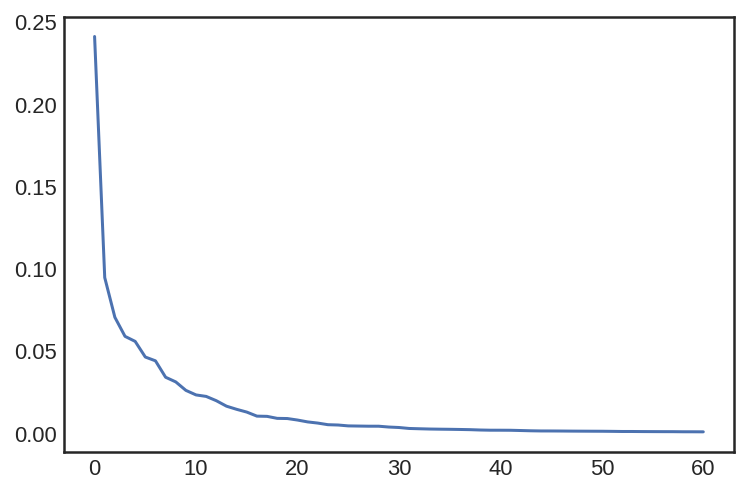

In [ ]:
# Plot the variance explained by each component
plt.plot(pca.explained_variance_ratio_)

Text(0, 0.5, 'cumulative explained variance')

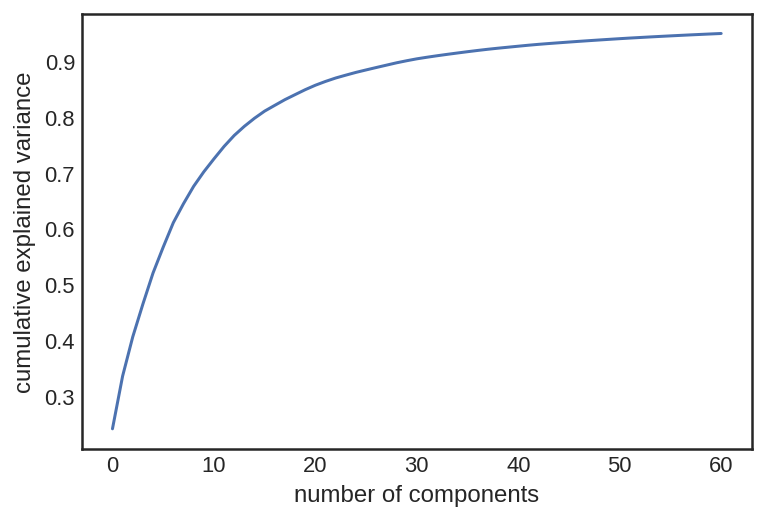

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

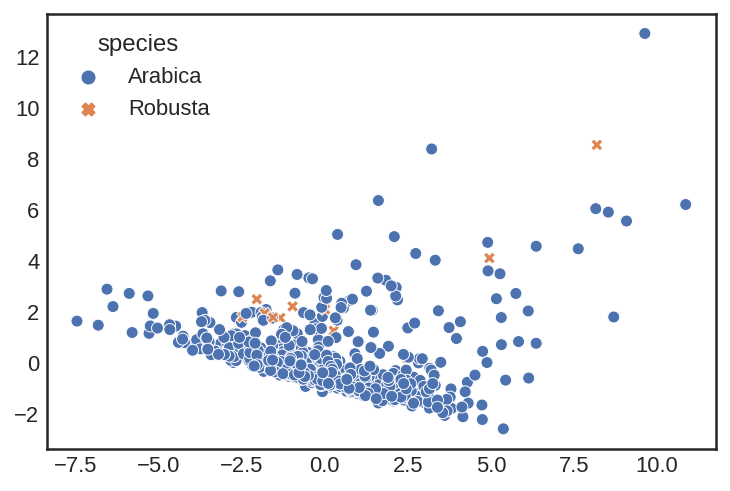

In [ ]:
# sample comparing principle components to the 'species' target variable
sns.scatterplot(X_train_prepared_pca[:, 0], X_train_prepared_pca[:, 1], style=y_train, hue=y_train)

## Model

### Train Model (Model Selection)

In [ ]:
# for voting classifer

clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

from sklearn.pipeline import make_pipeline

# for stacking classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]

In [ ]:
classifiers = [
    DummyClassifier(),
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GaussianNB(),
    BernoulliNB(binarize=True),
    SVC(probability=True),
    GaussianProcessClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(n_estimators=100),
    BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=0),
    ExtraTreesClassifier(n_estimators=100, random_state=0),
    HistGradientBoostingClassifier(),
    VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft'),
    StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()),
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier(),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier()]

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

log_cols=["Classifier", "Accuracy", "Log Loss", "Precision", "Recall", "F1 Score", "Balanced Accuracy", "Matthews Correlation Coefficient", "Fbeta", "Hamming Loss", "Jaccard", "Zero One Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train_prepared, y_train)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    y_pred = clf.predict(X_val_prepared)
    acc = accuracy_score(y_val, y_pred)
    print("Accuracy: {:.4%}".format(acc))

    y_pred = clf.predict_proba(X_val_prepared)
    ll = log_loss(y_val, y_pred)
    print("Log Loss: {}".format(ll))

    y_pred = clf.predict(X_val_prepared)
    prec = precision_score(y_val, y_pred, pos_label="Arabica")
    print("Precision: {:.4%}".format(prec))

    y_pred = clf.predict(X_val_prepared)
    recall = recall_score(y_val, y_pred, pos_label="Arabica")
    print("Recall: {:.4%}".format(recall))

    y_pred = clf.predict(X_val_prepared)
    f1 = f1_score(y_val, y_pred, pos_label="Arabica")
    print("F1 Score: {:.4%}".format(f1))

    y_pred = clf.predict(X_val_prepared)
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
    print("Balanced Accuracy: {:.4%}".format(balanced_acc))

    y_pred = clf.predict(X_val_prepared)
    matthews_corr = matthews_corrcoef(y_val, y_pred)
    print("Matthews Correlation Coefficient: {:.4%}".format(matthews_corr))

    y_pred = clf.predict(X_val_prepared)
    fbeta = fbeta_score(y_val, y_pred, beta=0.5, pos_label="Arabica")
    print("Fbeta: {:.4%}".format(fbeta))

    y_pred = clf.predict(X_val_prepared)
    hamming = hamming_loss(y_val, y_pred)
    print("Hamming Loss: {:.4%}".format(hamming))

    y_pred = clf.predict(X_val_prepared)
    jaccard = jaccard_score(y_val, y_pred, pos_label="Arabica")
    print("Jaccard: {:.4%}".format(jaccard))

    y_pred = clf.predict(X_val_prepared)
    zero_one = zero_one_loss(y_val, y_pred)
    print("Zero One Loss: {:.4%}".format(zero_one))

    log_entry = pd.DataFrame([[name, acc*100, ll, prec, recall, f1, balanced_acc, matthews_corr, fbeta, hamming, jaccard, zero_one]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)

DummyClassifier
****Results****
Accuracy: 97.3881%
Log Loss: 0.1244550268726061
Precision: 97.3881%
Recall: 100.0000%
F1 Score: 98.6767%
Balanced Accuracy: 50.0000%
Matthews Correlation Coefficient: 0.0000%
Fbeta: 97.8995%
Hamming Loss: 2.6119%
Jaccard: 97.3881%
Zero One Loss: 2.6119%
LogisticRegression
****Results****
Accuracy: 99.2537%
Log Loss: 0.02046499337532077
Precision: 99.2395%
Recall: 100.0000%
F1 Score: 99.6183%
Balanced Accuracy: 85.7143%
Matthews Correlation Coefficient: 84.1935%
Fbeta: 99.3907%
Hamming Loss: 0.7463%
Jaccard: 99.2395%
Zero One Loss: 0.7463%
LinearDiscriminantAnalysis
****Results****
Accuracy: 98.8806%
Log Loss: 0.38662809397288167
Precision: 98.8636%
Recall: 100.0000%
F1 Score: 99.4286%
Balanced Accuracy: 78.5714%
Matthews Correlation Coefficient: 75.1622%
Fbeta: 99.0888%
Hamming Loss: 1.1194%
Jaccard: 98.8636%
Zero One Loss: 1.1194%
KNeighborsClassifier
****Results****
Accuracy: 99.6269%
Log Loss: 0.00972900236324264
Precision: 99.6183%
Recall: 100.0000%


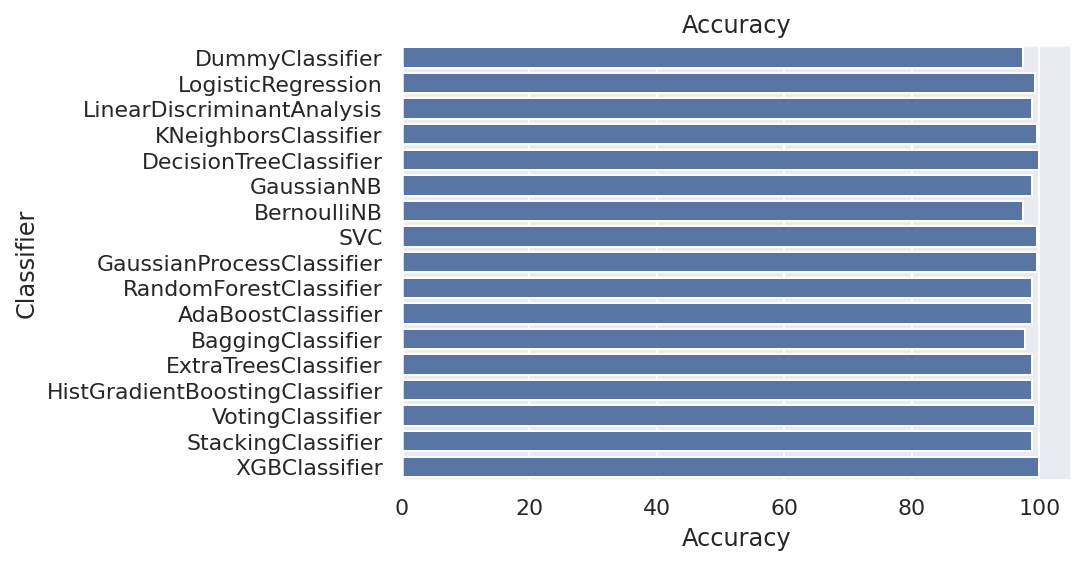

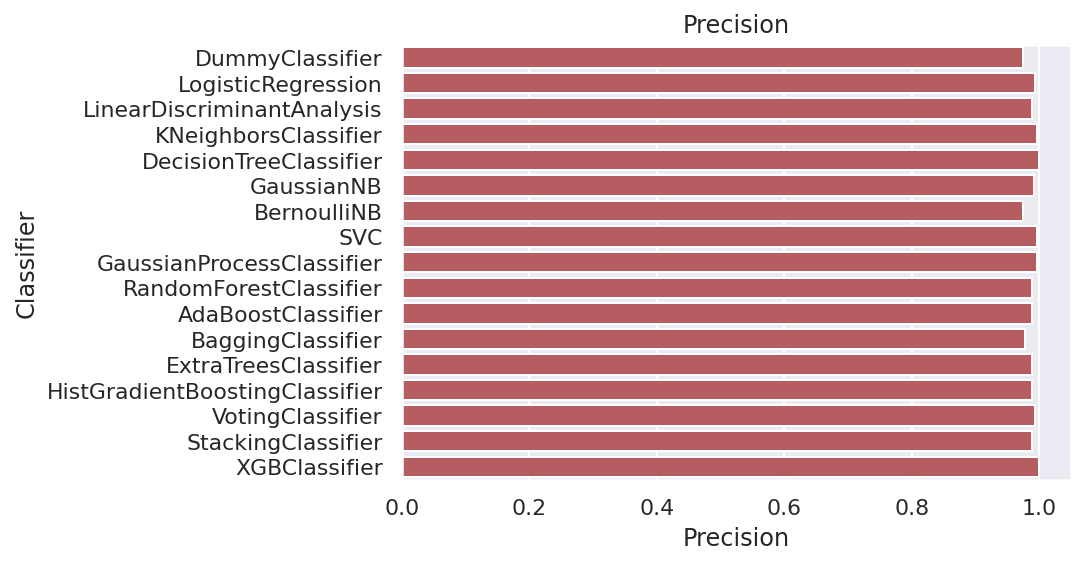

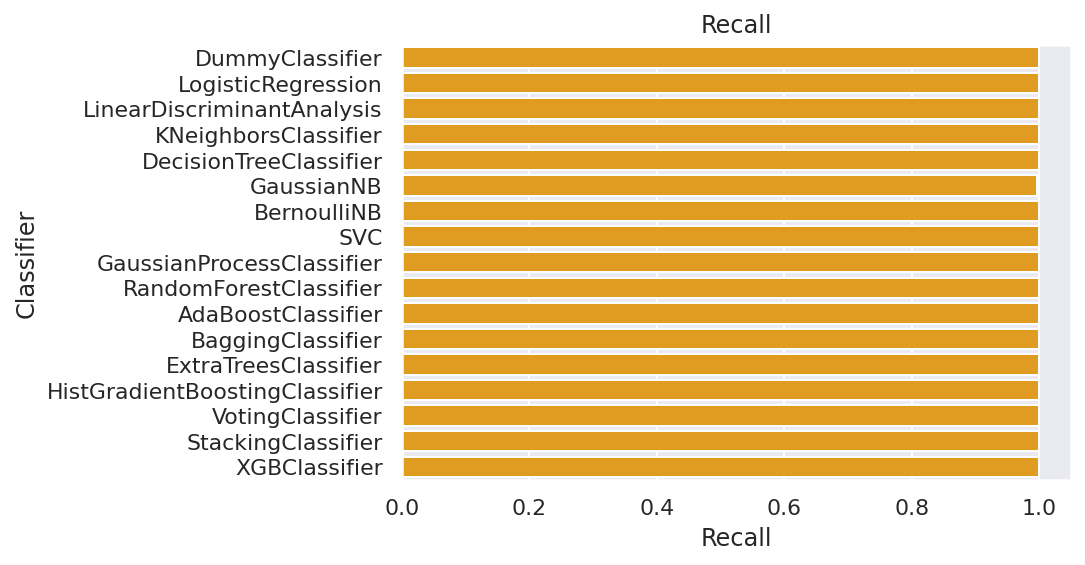

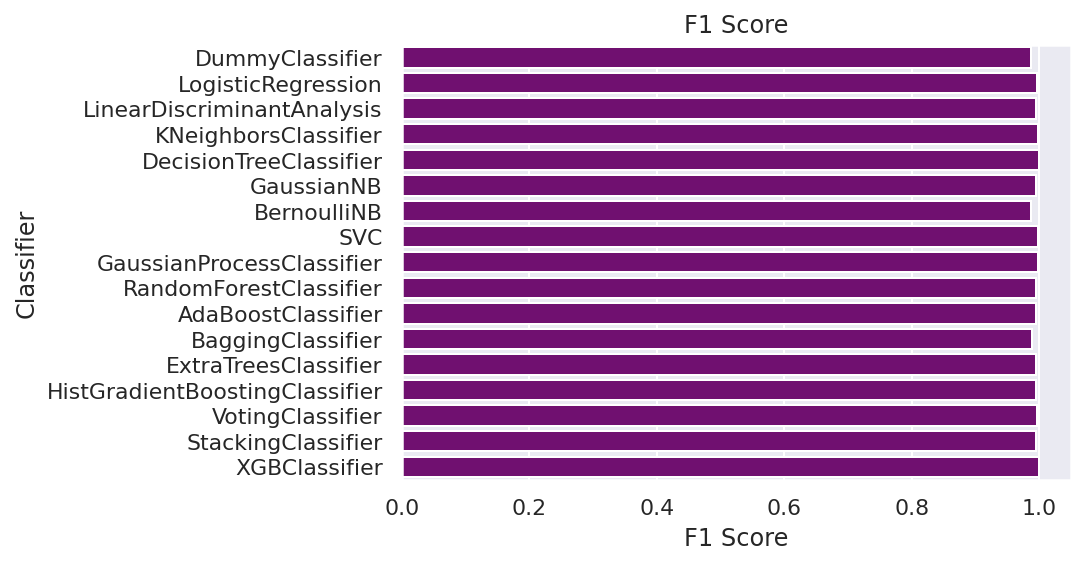

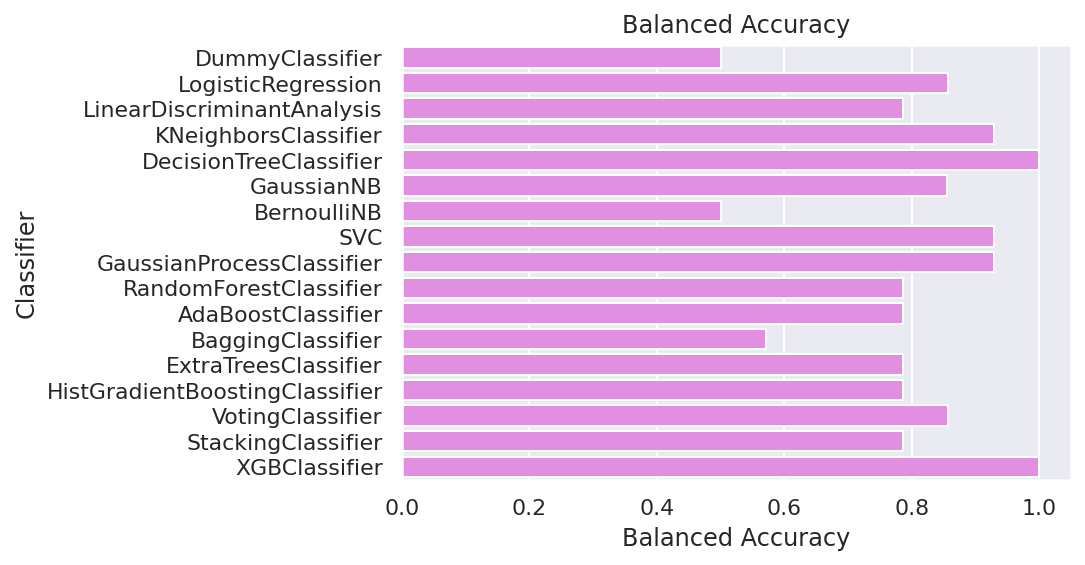

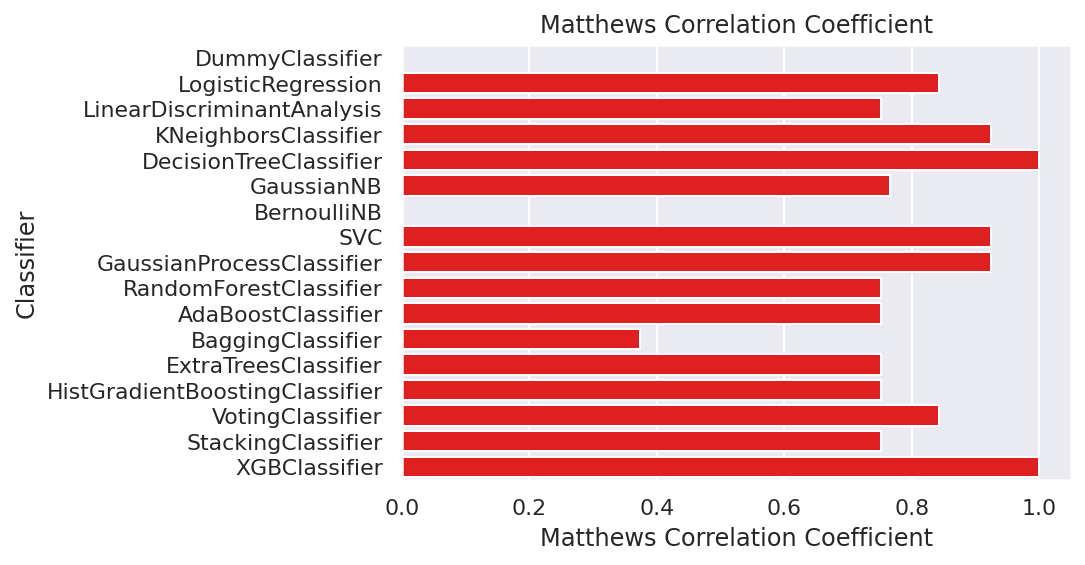

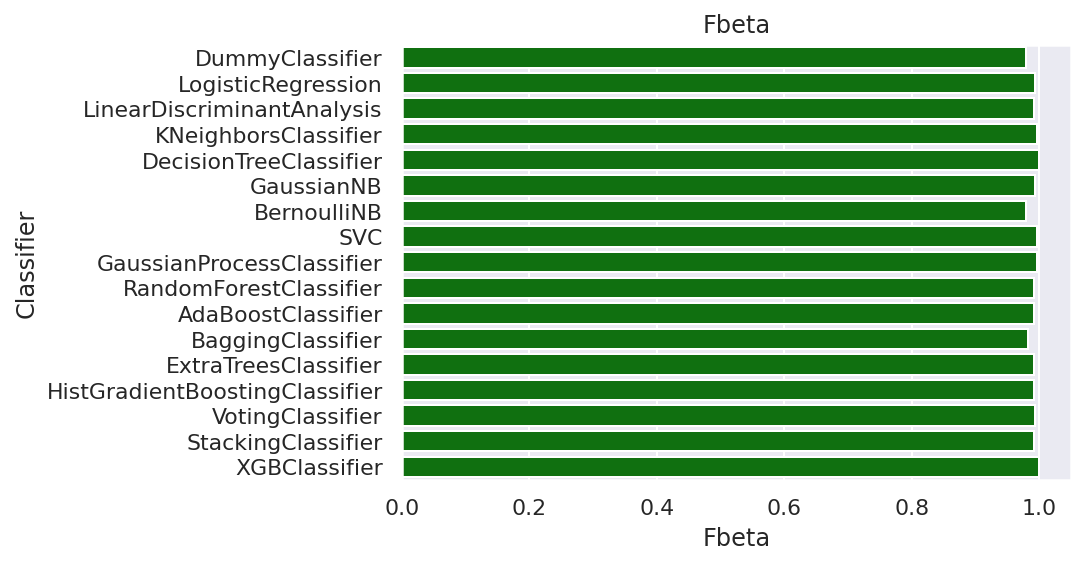

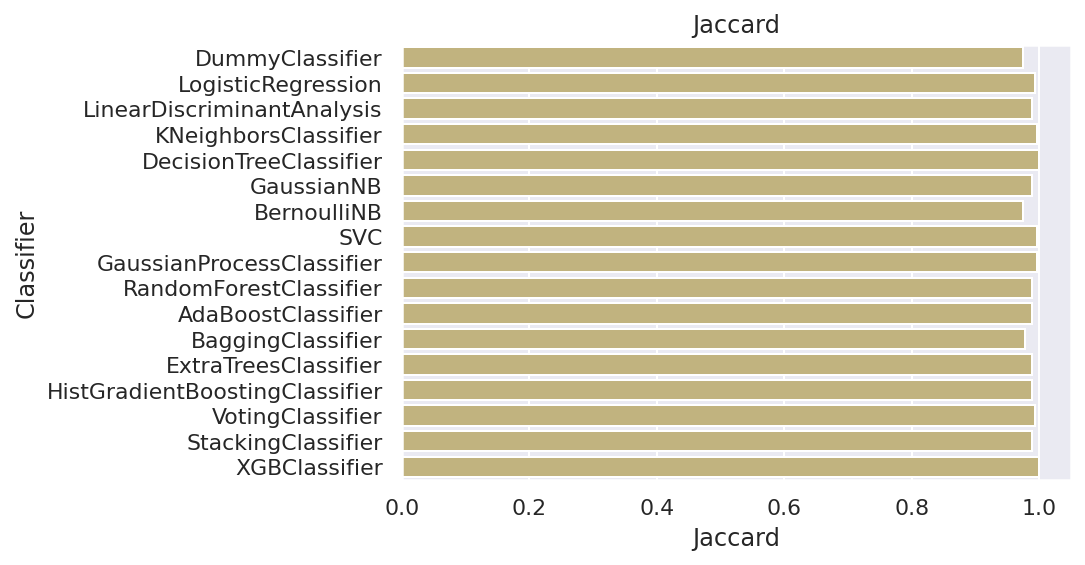

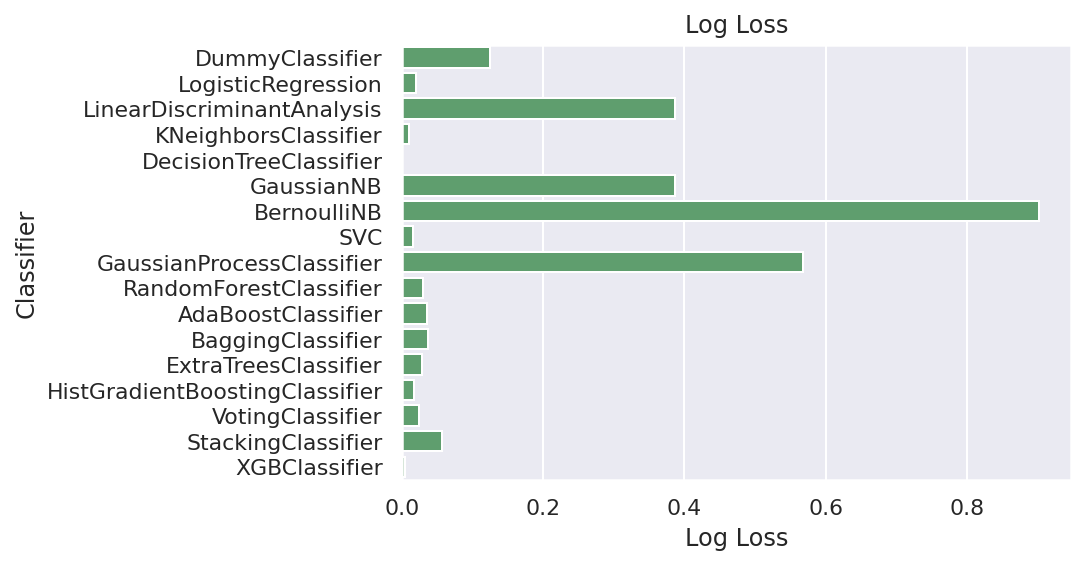

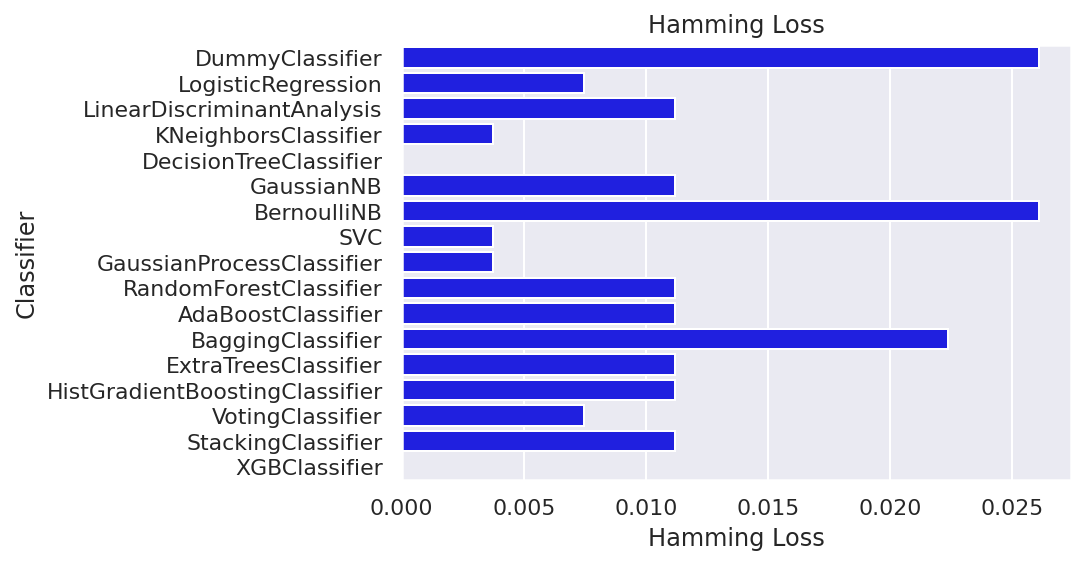

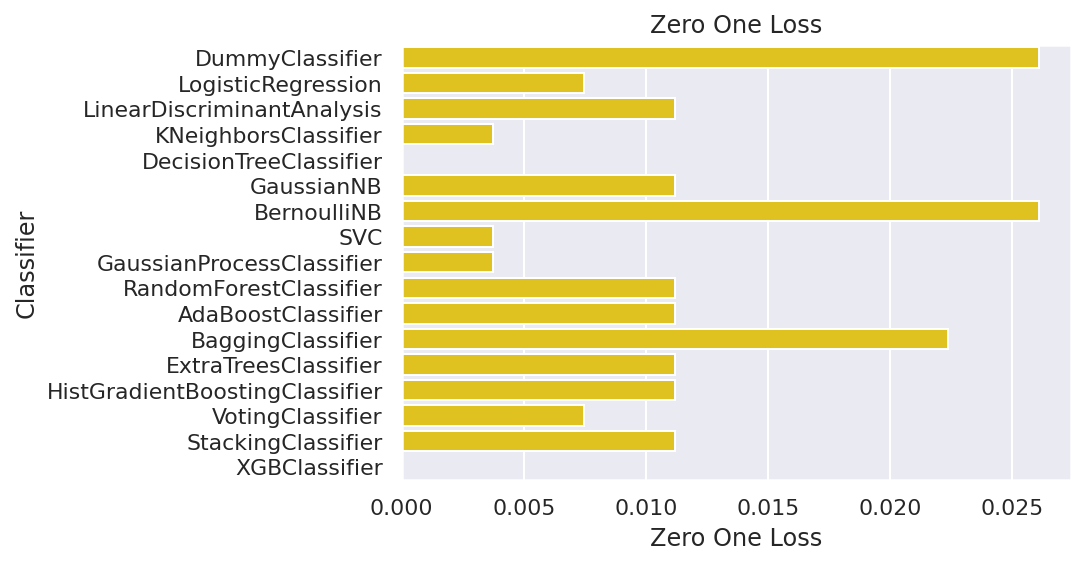

In [ ]:
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
plt.xlabel('Accuracy')
plt.title('Accuracy')
plt.show()

sns.barplot(x='Precision', y='Classifier', data=log, color="r")
plt.xlabel('Precision')
plt.title('Precision')
plt.show()

sns.barplot(x='Recall', y='Classifier', data=log, color="orange")
plt.xlabel('Recall')
plt.title('Recall')
plt.show()

sns.barplot(x='F1 Score', y='Classifier', data=log, color="purple")
plt.xlabel('F1 Score')
plt.title('F1 Score')
plt.show()

sns.barplot(x='Balanced Accuracy', y='Classifier', data=log, color="violet")
plt.xlabel('Balanced Accuracy')
plt.title('Balanced Accuracy')
plt.show()

sns.barplot(x='Matthews Correlation Coefficient', y='Classifier', data=log, color="red")
plt.xlabel('Matthews Correlation Coefficient')
plt.title('Matthews Correlation Coefficient')
plt.show()

sns.barplot(x='Fbeta', y='Classifier', data=log, color="green")
plt.xlabel('Fbeta')
plt.title('Fbeta')
plt.show()

sns.barplot(x='Jaccard', y='Classifier', data=log, color="y")
plt.xlabel('Jaccard')
plt.title('Jaccard')
plt.show()

sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")
plt.xlabel('Log Loss')
plt.title('Log Loss')
plt.show()

sns.barplot(x='Hamming Loss', y='Classifier', data=log, color="blue")
plt.xlabel('Hamming Loss')
plt.title('Hamming Loss')
plt.show()

sns.barplot(x='Zero One Loss', y='Classifier', data=log, color="gold")
plt.xlabel('Zero One Loss')
plt.title('Zero One Loss')
plt.show()

In [ ]:
# choose best performing classifier from above and assign below

clf = RandomForestClassifier()
clf.fit(X_train_prepared, y_train)

RandomForestClassifier()

In [ ]:
# top left is true positives = positive samples that are predicted as positive
# top right is false negative = positive samples that are predicted as negative
# bottom left is false positives = negative samples that are predicted as positives
# bottom right is true negatives = samples that are actually negative and are predicted as such

y_val_pred = clf.predict(X_val_prepared)
confusion_matrix(y_val, y_val_pred)

array([[261,   0],
       [  5,   2]])

In [ ]:
y_val_pred_lr = lr.predict(X_val_prepared)
confusion_matrix(y_val, y_val_pred_lr)

array([[261,   0],
       [  2,   5]])

In [ ]:
# andreas technique, comparing selected classifier (random forest) vs logistic regression

f1_rf = f1_score(y_val, y_val_pred, pos_label="Arabica")
print(f"f1 score of random forest: {f1_rf:.3f}")

fl_lr = f1_score(y_val, y_val_pred_lr, pos_label="Arabica")
print(f"f1 score of logistic regression: {fl_lr:.3f}")

ba_rf = balanced_accuracy_score(y_val, y_val_pred)
print(f"balanced accuracy score of random forest: {ba_rf:.3f}")

ba_lr = balanced_accuracy_score(y_val, y_val_pred_lr)
print(f"balanced accuracy score of logistic regression: {ba_lr:.3f}")

y_val_prob = clf.predict_proba(X_val_prepared)[:,1]
y_val_prob_lr = lr.predict_proba(X_val_prepared)[:,1]

ap_rf = average_precision_score(y_val, y_val_prob, pos_label="Arabica")
print(f"average precision score of random forest: {ap_rf:.3f}")

ap_lr = average_precision_score(y_val, y_val_prob_lr, pos_label="Arabica")
print(f"average precision score of logistic regression: {ap_lr:.3f}")

auc_rf = roc_auc_score(y_val, y_val_prob)
print(f"area under roc auc score of random forest: {auc_rf:.3f}")

auc_lr = roc_auc_score(y_val, y_val_prob_lr)
print(f"area under roc auc score of logistic regression: {auc_lr:.3f}")

f1 score of random forest: 0.991
f1 score of logistic regression: 0.996
balanced accuracy score of random forest: 0.643
balanced accuracy score of logistic regression: 0.857
average precision score of random forest: 0.932
average precision score of logistic regression: 0.904
area under roc auc score of random forest: 0.999
area under roc auc score of logistic regression: 1.000


### Hyperparameter Tuning

#### Parameter Grids

In [ ]:
param_grid_log_reg = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.0001, 0.01, 0.1, 10, 100, 1000],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]}]

param_grid_svc = {'svc__C': np.logspace(-3, 2, 6),
                  'svc__gamma': np.logspace(-3, 2, 6) / X_train.shape[0],
                  'kernel' : ['linear', 'rbf'],
                  'C':[0.1, 1, 10]}

param_grid_trees = {'max_depth': [2, 3, 4, 5],
                    'n_estimators': [5, 50, 250],
                    'min_samples_split': [2, 3, 4],
                    'min_samples_leaf': range(1, 7),
                    'max_leaf_nodes':range(2, 20),
                    'ccp_alpha': np.linspace(0., 0.03, 20),
                    'min_impurity_decrease': [.01, .02, .03, .04, .05]}

param_grid_gradient_boost = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]}

param_grid_mlp = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']}

#### GridSearchCV

In [ ]:
grid_search = RandomizedSearchCV(clf, param_grid_trees, cv=5, return_train_score=True, verbose=0) # scoring="accuracy", "f1", "log_loss", "roc_auc"
grid_search.fit(X_train_prepared, y_train)

print(f"best mean hyperparameter gridsearch score: {grid_search.best_score_}")
print(f"best parameters: {grid_search.best_params_}")
print(f"validation-set score: {grid_search.score(X_val_prepared, y_val):.3f}")

best mean hyperparameter gridsearch score: 0.9850621118012421
best parameters: {'n_estimators': 5, 'min_samples_split': 3, 'min_samples_leaf': 4, 'min_impurity_decrease': 0.01, 'max_leaf_nodes': 5, 'max_depth': 3, 'ccp_alpha': 0.0015789473684210526}
validation-set score: 0.974


In [ ]:
# logreg comparison
lr = LogisticRegression(random_state=42)
lr.fit(X_train_prepared, y_train)

grid_search_lr = RandomizedSearchCV(lr, param_grid_log_reg, cv=5, return_train_score=True, verbose=0) # scoring="accuracy", "f1", "log_loss", "roc_auc"
grid_search_lr.fit(X_train_prepared, y_train)

print(f"best mean hyperparameter gridsearch score: {grid_search_lr.best_score_}")
print(f"best parameters: {grid_search_lr.best_params_}")
print(f"validation-set score: {grid_search_lr.score(X_val_prepared, y_val):.3f}")

best mean hyperparameter gridsearch score: 0.993781055900621
best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 100, 'C': 1000}
validation-set score: 0.996


In [ ]:
# saving final_model from best gridsearch results
final_model = grid_search.best_estimator_
final_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0015789473684210526,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': 5,
 'max_samples': None,
 'min_impurity_decrease': 0.01,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_min_impurity_decrease',
       'param_max_leaf_nodes', 'param_max_depth', 'param_ccp_alpha', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

### Model Validation

#### Cross Validation

In [ ]:
# https://scikit-learn.org/stable/modules/cross_validation.html#obtaining-predictions-by-cross-validation
# like cross_val_score, cross_val_predict performs K-fold cross-validation but instead of returning the evaluation scores, it returns predictions made on each test fold

# select best cv from above to use for cross_val_predict
y_val_pred_cv = cross_val_predict(final_model, X_val_prepared, y_val, cv=10)

val_scoring_cv = accuracy_score(y_val, y_val_pred_cv)
val_scoring_cv

0.9738805970149254

#### Learning Curves
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve

In [ ]:
from sklearn.model_selection import learning_curve

cv = StratifiedKFold(n_splits=5, shuffle=True)

train_sizes, train_scores, validation_scores = learning_curve(final_model, X_train_prepared, y_train, cv=cv)
print("dataset size: %d" % X_train_prepared.shape[0])
print("learning curve training set sizes: %s" % train_sizes)

dataset size: 803
learning curve training set sizes: [ 64 208 353 497 642]


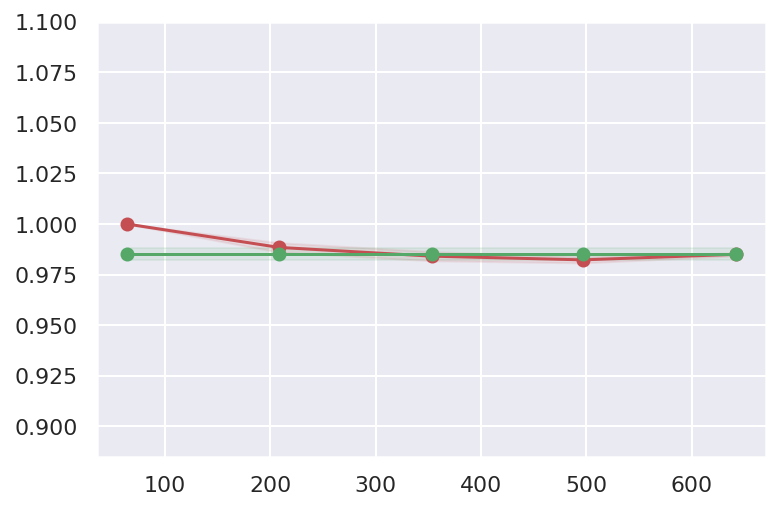

In [ ]:
 def plot_learning_curve(train_sizes, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)


plot_learning_curve(train_sizes, train_scores, validation_scores)

## Interpret

### Model Evaluation (Performance Metrics and Scoring)

In [ ]:
y_test_pred = final_model.predict(X_test_prepared)
accuracy_score(y_test, y_test_pred)

0.9664179104477612

#### Accuracy
Accuracy is the fraction of correctly classified samples.

It is the number of samples which the right label was predicted divided by the total number of samples

In [ ]:
print(accuracy_score(y_test, y_test_pred))

0.9664179104477612


#### Confusion Matrix

In [ ]:
#confusion_matrix(y_train, y_train_pred) #normalize='true', 'pred'
confusion_matrix(y_test, y_test_pred)

array([[259,   0],
       [  9,   0]])

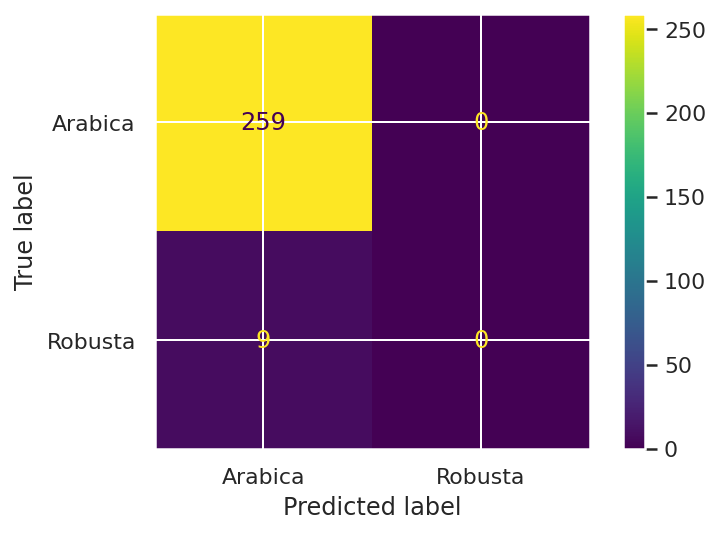

In [ ]:
# top left is true positives = positive samples that are predicted as positive
# top right is false negative = positive samples that are predicted as negative
# bottom left is false positives = negative samples that are predicted as positives
# bottom right is true negatives = samples that are actually negative and are predicted as such

plot_confusion_matrix(final_model, X_test_prepared, y_test)

In [ ]:
#print(classification_report(y_train, y_train_pred, target_names=["0", "1"]))
print(classification_report(y_test, y_test_pred, target_names=["Arabica", "Robusta"]))

              precision    recall  f1-score   support

     Arabica       0.97      1.00      0.98       259
     Robusta       0.00      0.00      0.00         9

    accuracy                           0.97       268
   macro avg       0.48      0.50      0.49       268
weighted avg       0.93      0.97      0.95       268



#### Precision, Recall and F1 Score

Precision is True Positives / False Positives + True Positives

It is the fraction of positive predictions that are actually positive
Precision is the chance that a positive prediction is correct

Recall is True Positives / False Negatives + True Positives
It is the fraction of positives that get detected

Recall is the chance that a sample is actually positive will get predicted as such

F1 Score is the harmonic mean of precision and recall. If you need a single score to validate your classifier is good choice

In [ ]:
precision_score(y_test, y_test_pred, pos_label='Arabica')

0.9664179104477612

In [ ]:
recall_score(y_test, y_test_pred, pos_label='Arabica')

1.0

In [ ]:
# f1_score combines precision and recall into a single metric and is the harmonic mean of precision and recall,
# the classifier will only get a high f1_score is both precision and recall are high
# f1_score = (2 * precision * recall) / (precision + recall)
f1_score(y_test, y_test_pred, pos_label='Arabica')

0.9829222011385199

### Model Persistence

In [ ]:
dump(final_model, 'finalmodel.joblib')

['finalmodel.joblib']

In [ ]:
clf = load('finalmodel.joblib')